# App Data Analysis Tutorial

Clark Abbott and Henry Covington

# Introduction

In [1]:
# This is the Final Project Tutorial File 
# We will scrape data from https://www.kaggle.com/lava18/google-play-store-apps
# This project is hosted at https://github.com/clabbott/app-data-analysis

#### There's An App For That

As you may know, in 2007 Apple took the world of technology by storm unveiling their newest product, the IPhone. Today, <a href="https://www.pewresearch.org/internet/fact-sheet/mobile/"> 81% of Americans own a smartphone</a> and <a href="https://review42.com/smartphone-statistics/#:~:text=There%20are%205.11%20billion%20unique,billion%20of%20them%20use%20smartphones.&text=100%20million%20people%20have%20started,smartphone%20users%20worldwide%20in%202020.">there are 2.71 billion smartphone users across the globe</a>. 

In IPhone's 3rd generation, Apple's main slogan for the device was "There's An App For That". This slogan called to attention the abundance and resourcefulness of apps. It became such a popular buzz phrase that <a href="https://www.cnn.com/2010/TECH/mobile/10/12/app.for.that/index.html"> Apple trademarked it </a> and gave insperation to <a href="https://youtu.be/EhkxDIr0y2U"> plenty of parodies</a>. But the point stands, <a href="https://www.statista.com/statistics/276623/number-of-apps-available-in-leading-app-stores/#:~:text=What%20are%20the%20biggest%20app,million%20available%20apps%20for%20iOS."> there are over 2.8 billion apps on the Google Play Store and 1.9 on the Apple App Store</a>.

In a world where the amount of apps are overabundant and smartphones become increasingly more integral to communication and entertainment, knowing what qualities get apps installed is valuable information.

#### Importance With Repect to Data Science?
Data Science has a deeper relationship with apps than being important to modern technology. Phone app stores rely heavily on algorithms to rank and query apps to provide a helpful user experience. With billions of apps to sort through, Data Science knowledge is important to the discovery of apps.

#### Tools for the Job
For this tutorial we will use <a href="https://www.python.org/"> Python </a> and several of it's useful libraries to do some of the heavy lifting. Some experience with Python is expected.

<a href="https://pandas.pydata.org/">Pandas</a>: Creates lightweight and easy to manipulate dataframes which we will use to hold our data.

<a href="https://numpy.org/">Numpy</a>: Lots of helpful mathmatic functions.

<a href="">Matplotlib</a>: Data visualization

In [2]:
#import libraries
import pandas as pd
import datetime
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
import datetime
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Data Collection

The first step in the data life cycle is to collect data we want to use. Sometimes this means looking around, taking HTML code directly and sorting it into tables. However, there are a lot of public datasets out there and someone might already be providing the data your looking for. <a href="https://www.kaggle.com/">Kaggle</a> is one place where you can find datasets and happens to have the data we are looking for in this tutorial. For this tutorial we are using Lavanya Gupta's 10k Google Play Store database. There is a lot more apps on the market today, but this is a nice sample for our tutorial. You can download and learn more about it <a href="https://www.kaggle.com/lava18/google-play-store-apps">here</a>.

In [3]:
#Read Google Play Store data into dataframe
df = pd.read_csv(r"googleplaystore.csv") 
#Set base data types. We will change some of these as we go on.
df.astype({'App':'str', 'Category':'str', 'Rating':'float32', 
           'Reviews':'str','Size':'str','Installs':'str',
          'Type':'str', 'Price':'str', 'Content Rating':'str', 
           'Genres':'str', 'Last Updated':'str', 'Current Ver':'str',
          'Android Ver':'str'})
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data Processing

The table we are scraping from has 13 columns which need to be processed differently and can be reduced and cleaned to a more manageable format. 

The App column is the name of the app and must be interpreted as a String. The names should all be unique. We will be dropping duplicate app names and keeping the apps that have more reviews.

The Category column is the general category of the app and must be interpreted as a String. Many of the apps will have the same category value. This is a categorical variable to classify the app in a different way than its genre. 

The Rating column is the average user rating for the app between 1 and 5, with some outliers that must be dropped due to bad data that doesn't fit within these bounds. This value is a float. 

The Reviews column is the number of user reviews for the app. This value is an integer.

The Size column is the size of the app, how much space it takes up on a device. This value contains units of Megabite and other sizes and we have standardized these values to an integer value so they can be understood in context of each other. We drop the value 'Varies with size' due to its ambigiuity. 

The Installs column is a lower bound on the number of devices that have installed the app. The raw data gives units in minimum possible values so we interpreted these minimum values into integer values. 

The Type column is whether it is a free app or not. This is a string value that we will interpret as a boolean value with True for Free and False for Not Free.

The Price column is the price of the app. Once we remove the dollar sign from the price of some of these values, this is interpreted as a float value. 

The Content Rating column is a string determining which group the app is developed for. We had to break these columns down into fewer categories with only a few unique values to be able to analyze the data. The categories we chose were "Everyone", "Teen", and "Adult".

The Genres Column is a succinct, general category for the app's content. Most apps fit into one of the multiple major categories but there are also a number of apps with more specific categories. For these apps, we placed them in one of the major categories by scanning for keywords that would give clues to their categorical placement. We formatted this column as strings. This is different than Category because there could be multiple Genres for a given observation and the genre comes in the form of many different potential keywords.

The Last Updated Column contains date information for when the app was last updated. We cleaned this data by parsing it using the datetime library so it was easier to sort through.

The Current Ver Column is a string detailing the current version of the app available on the Play Store at the time of scraping. This will be dropped, as it has no use in our data analysis.

The Android Ver Column is a string detailing the minimum required version of the app to work on an android device.
This will be dropped, as it has no use in our data analysis.

Notably, the scraper of the dataset included that the row for "Life Made WI-Fi Touchscreen Photo Frame" was formatted incorrectly so we made the choice to drop that entry, other incorrectly formatted entries, and entries with NaN in a column before cleaning. 

In [4]:
#Dropping Life Made WI-Fi Touchscreen Photo Frame and Command & Conquer: Rivals which are malformed
df = df.drop([10472, 9148])

# Dropping rows that contain any NaN
df = df.dropna()

# Dropping Current Ver and Android Ver due to their unuse 
df = df.drop(columns=['Current Ver', 'Android Ver'])

#Formatting App 

#Dropping Duplicates, Keep app with most reviews
df = df.sort_values('Reviews', ascending=False)
df = df.drop_duplicates(subset='App', keep='first') #1181 Dropped Apps
df = df.sort_index() #Sort back by index

#Formatting Reviews

#Converting to Numeric
df['Reviews'] = pd.to_numeric(df['Reviews'])


#Formatting Size

#Converting "Varies with device" with NaN values
#Life Made WI-Fi Touchscreen Photo Frame with a size of 1000+ is also replaced with a NaN value
#This makes the column useable, but biased with against these values.
df['Size'] = df['Size'].replace("Varies with device", np.NaN)

#Converts Size from string to a kb value
#Values that end in Mb are converted to kb
def data_string_to_int(data_str):
    return {
        'k':float(data_str[:-1]),
        'M':float(data_str[:-1]) * 1000
    }.get(data_str[-1:], np.NaN)


df['Size'] = df['Size'].apply(lambda x:  data_string_to_int(x) if pd.notnull(x) else x)
df['Size'] = pd.to_numeric(df['Size'])


# Formatting Installs
# Drops plusses and commas from the strings in the Installs column

for index, row in df.iterrows():
    df['Installs'][index] = df['Installs'][index][:-1]
    df['Installs'][index] = df['Installs'][index].replace(',','')

df = df.astype({'Installs': 'int32'})


# Formatting Type
# Change name of column from "Type" to "Is_Free" and transform it into a boolean value
df = df.rename(columns={"Type": "Is_Free"})
df['Is_Free'] = df['Is_Free'] == 'Free'


# Formatting Price
# Remove dollar sign from front (if necessary) and change to float
for index, row in df.iterrows():
    if "$" in df['Price'][index]:
        df['Price'][index] = df['Price'][index][1:5]
df = df.astype({'Price': 'float32'})

# Formatting Content Rating

# This function performs the "in" function over a list of possible values that might be in the string. 
def any_elt_in_list_in_string(list_p, string_p):
    for elt in list_p:
        if(elt in string_p):
            return True
    return False

# Created three new columns tied to the "Everyone", "Teen", and "Adult" content ratings. 
for index, row in df.iterrows():
    if (any_elt_in_list_in_string(["Mature", "Adults","Unrated"], df['Content Rating'][index])):
        df['Content Rating'][index] = "Adult"
    elif ("Teen" in df['Content Rating'][index]):
        df['Content Rating'][index] = "Teen"
    elif ("Everyone" in df['Content Rating'][index]):
        df['Content Rating'][index] = "Everyone"
    else:
        df['Content Rating'][index] = "NaN"
        pass
    pass


# Formatting Genres
# Create eight different genres organized by keywords that pertain to that genre. 

# Utilities have a single or small range of tasks and manage the phone's UI and most basic functionalities. 
# Basic functionalities includes basic Internet browsing, cellular communication, health tracking, and gps
utilities_keywords = ["Tools", "Personalization", "Maps", "Medical"]
# Social Networking apps are apps whose primary functions are to enable abstracted communication with people over the internet. 
social_networking_keywords = ["Communication","Social", "Dating"]
# Lifestyle apps are apps that are designed for continual use that have a more complicated function than utilites. 
# These apps have a primary purpose which is not back-and-forth communication with people on the internet. 
lifestyle_keywords = ["Beauty", "Events", "Finance", "Food & Drink", "Health & Fitness", "House & Home", "Lifestyle", 
                      "Shopping", "Travel", "Weather", "News"]
# Productivity apps have all the features of lifestyle apps but are focused on helping people accomplish tasks quicker/easier.
# Books are in this category because you dont have to go and buy a physical book, you can get one and read it right away on 
# your device. 
productivity_keywords = ["Business", "Productivity", "Auto & Vehicles"]
# Education apps are productivity apps that are specifically focused on educational productivity
education_keywords = ["Education", "Educational", "Libraries & Demo", "Books & Reference", "Parenting", "Pretend Play"]
# Entertainment apps are apps that are focused on helping a user have fun. These are separated from games as a category 
# due to the sheer number of games on the app store. 
entertainment_keywords = ["Comics", "Entertainment", "Music", "Video Player", "Brain Games", "Music & Video"]
# Creativity apps are apps that allow users to be creative as a primary function, usually with the hardware of the device.
creativity_keywords = ["Art & Design","Photo","Creativity", "Video Players & Editors"]
# Games are apps that are defined by their high degree of interactivity and entertainment.
games_keywords = ["Arcade", "Puzzle", "Racing", "Sports", "Casual","Adventure","Card", "Simulation",
                  "Trivia", "Action", "Word", "Role Playing", "Strategy","Game", "Board","Casino",
                 "Pretend Play"]

# Now we seperate the genres
# An app with a semicolon has two genre keywords: if the genre keywords denote two different genres, the app will be entered 
# into the table again to denote its membership to two different categories. This enables the genre data to be analyzed 
# within one variable without having to split it among two different variables, but looking at the dataset as a whole must 
# be filtered for duplicate entries again to avoid double-counting apps that cross genres. 

# index is from the current row in the table, df is the df
# prev_genre is "" if this is the first time the function is run and a value if it is the second time this function is run
def find_genre_by_keyword(index, df, prev_genre):
    ret_genre = None
    if (any_elt_in_list_in_string(utilities_keywords, df['Genres'][index])):
        if(prev_genre != "Utilities"):
            ret_genre = "Utilities"
    if (any_elt_in_list_in_string(social_networking_keywords, df['Genres'][index])):
        if(prev_genre != "Social Networking"):
            ret_genre = "Social Networking"
    if (any_elt_in_list_in_string(lifestyle_keywords, df['Genres'][index])):
        if(prev_genre != "Lifestyle"):
            ret_genre = "Lifestyle"
    if (any_elt_in_list_in_string(productivity_keywords, df['Genres'][index])):
        if(prev_genre != "Productivity"):
            ret_genre = "Productivity"
    if (any_elt_in_list_in_string(education_keywords, df['Genres'][index])):
        if(prev_genre != "Education"):
            ret_genre = "Education"
    if (any_elt_in_list_in_string(entertainment_keywords, df['Genres'][index])):
        if(prev_genre != "Entertainment"):
            ret_genre = "Entertainment" 
    if (any_elt_in_list_in_string(creativity_keywords, df['Genres'][index])):
        if(prev_genre != "Creativity"):
            ret_genre = "Creativity" 
    if (any_elt_in_list_in_string(games_keywords, df['Genres'][index])):
        if(prev_genre != "Games"):
            ret_genre = "Games"
    return ret_genre
       

# This for loop iterates through the rows of the df
for index, row in df.iterrows():
    genre_1 = find_genre_by_keyword(index, df, "")
     # Checks for semicolons to create another genre if necessary
    if(';' in df['Genres'][index]):
        genre_2 = find_genre_by_keyword(index, df, genre_1)
    else:
        genre_2 = None
    if not(genre_2 is None):
        # Make deep copy of the row
        new_entry = row.copy()
        # change the genre column of new_entry to be genre_2's value
        new_entry['Genres'] = genre_2
        # make a new entry in df for this deep copy
        df = df.append(new_entry)
    # change the genre column to be genre_1's value 
    df['Genres'][index] = genre_1

# Rename "Genres" to "Genre" to prepare for shift
df = df.rename(columns={"Genres": "Genre"})

# Formatting Last Updated
df['Last Updated']= pd.to_datetime(df['Last Updated'])
print(df.dtypes)
df.head()

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int64
Is_Free                     bool
Price                    float64
Content Rating            object
Genre                     object
Last Updated      datetime64[ns]
dtype: object


,App,Category,Rating,Reviews,Size,Installs,Is_Free,Price,Content Rating,Genre,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,True,0.0,Everyone,Creativity,2018-01-07
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,True,0.0,Everyone,Creativity,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,True,0.0,Teen,Creativity,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,True,0.0,Everyone,Creativity,2018-06-20
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,True,0.0,Everyone,Creativity,2017-03-26


### Eliminating duplicates from dataset
Currently, there are duplicates in the dataset. Every app that has two genres has two entries in the dataframe. In order to fix this, we will combine the apps with matching names and pick the first genre that appears, as the genre will not be important for this type of analysis. 

This dataset (df) will be used when we look at the dataset and are not focused on genre. When we only use genre, we will use the dataset that has not been collapsed and the duplicates have not been removed (genre_df).

In [5]:
genre_df = df.copy()
df = df.groupby(['App'], as_index=False).agg({'App': 'first', 'Category': 'first',
                                              'Rating': 'first', 'Reviews': 'first',
                                              'Size': 'first', 'Installs': 'first',
                                              'Is_Free': 'first', 'Price': 'first',
                                              'Size': 'first', 'Content Rating': 'first',
                                              'Last Updated': 'first', 'Genre': 'first'})
df.head()

,App,Category,Rating,Reviews,Size,Installs,Is_Free,Price,Content Rating,Last Updated,Genre
0,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22000.0,1000000,True,0.0,Everyone,2018-08-02,Social Networking
1,- Free Comics - Comic Apps,COMICS,3.5,115,9100.0,10000,True,0.0,Adult,2018-07-13,Entertainment
2,.R,TOOLS,4.5,259,203.0,10000,True,0.0,Everyone,2014-09-16,Utilities
3,/u/app,COMMUNICATION,4.7,573,53000.0,10000,True,0.0,Adult,2018-07-03,Social Networking
4,058.ba,NEWS_AND_MAGAZINES,4.4,27,14000.0,100,True,0.0,Everyone,2018-07-06,Lifestyle


# Exploratory Analysis and Visualization 

Now that our data is cleaned up the next step in the data science life cycle is Exploratory Analysis and Visualization. This part of the project is focused on visually identifying the complex answers to our questions through the use of graphs and charts. The dataset is already organized (In the Data Processing Step) so that it can be easily analyzed and displayed. We use visual aids so that we can answer our exploratory questions: 
1. As one variable changes, how does the rest of the dataset change around it? 
2. Which variables cause the most dramatic changes? 
3. What is the best way to measure these changes/differences? 
4. How can we display these differences in a way that is understandable and useful?
5. Most importantly, can we identify trends in the data? Meaning, can we use one value to reliably predict another value? This directly leads into our next section: Machine Learning, Hypothesis Testing, and Analysis. 

## Data Visualization by Variable
We'll start off with some basic data probing to see the way the data is shaped and arranged, starting with analysis by Genre. We have separated the apps into 8 distinct genres so we can now look for trends across those genres and see what this information can tell us about the different genres of apps. 

We will display the differences in the data using some of our numerical variables: Rating, Reviews, and Installs. We chose these because they would display well on numerical graphs and charts, making it easier to see how changing our categorical variables could show differences in our numerical variables. 

### Independent Variable Tested: Genre

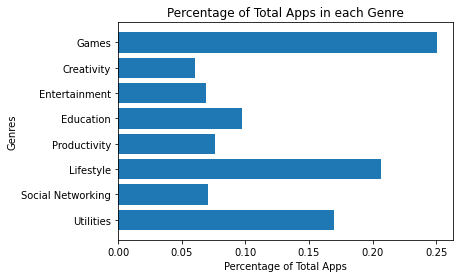

This graph displays the number of apps contained in each genre. We will use this data to scale the graphs below
so each genre is equally weighted to every other genre. Weighting the genres equally will allow us to show the differences
between an average app in every genre, not just the totals for every genre. It is important to focus on the average
and not the total because some genres may have more apps than other genres, causing those genres to have more reviews/installs 
simply because there are more apps to review/install.
The graphs below are also scaled by dividing them by the number of installs/reviews as a whole. This allows us to compare
the two statistics on equal footing: the percentage of a whole. The units are: an individual (average) app's percentage
of the total number of installs/reviews in the dataset.


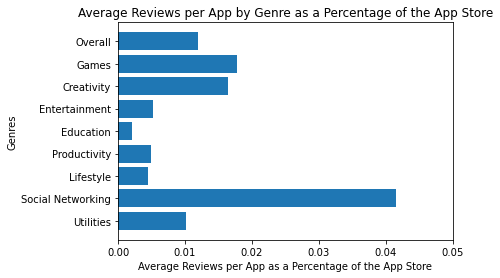

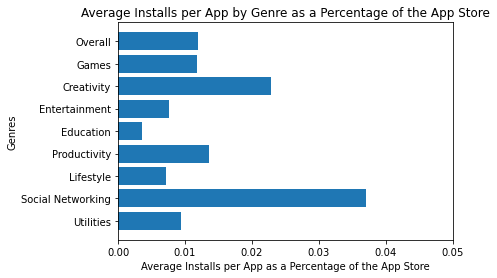

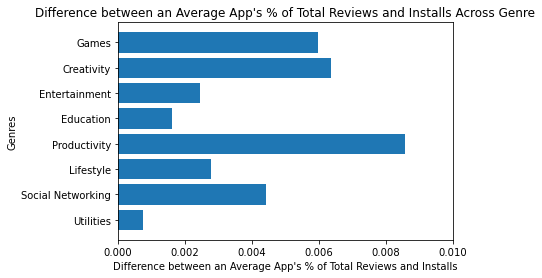

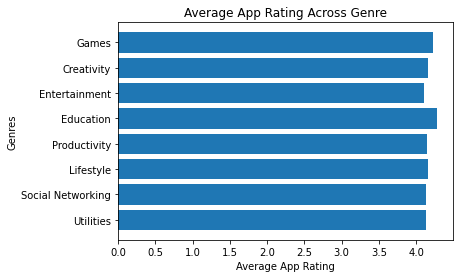

In [6]:
# Determine the total number of reviews, installs, and ratings
TOTAL_INSTALLS = 0
TOTAL_REVIEWS = 0
TOTAL_APPS = 0
for index, row in genre_df.iterrows():
    TOTAL_INSTALLS += (row['Installs'])
    TOTAL_REVIEWS += (row['Reviews'])
    TOTAL_APPS += 1
    
# Make a dictionary to store num apps for a genre 
num_dict = {'Utilities': 0, 'Social Networking': 0, 'Lifestyle': 0, 'Productivity': 0, 
        'Education': 0, 'Entertainment': 0, 'Creativity': 0, 'Games': 0,}

# Iterate through rows and increment hashes
for index, row in genre_df.iterrows():
    num_dict[(row['Genre'])]+= 1

# Divide each genre's number of apps by the total number of apps on the app store, this is the percentage of total apps for each genre
for genre in num_dict.keys(): 
    num_dict[genre] = num_dict[genre]/TOTAL_APPS
    
# Display Findings
fig, ax = plt.subplots()
y_pos = np.arange(len(num_dict.keys()))
ax.set_yticks(y_pos)
ax.set_yticklabels(num_dict.keys())
plt.xlabel("Percentage of Total Apps")
plt.ylabel("Genres")
plt.title("Percentage of Total Apps in each Genre")
plt.barh(y_pos,num_dict.values())
plt.show()

print("This graph displays the number of apps contained in each genre. We will use this data to scale the graphs below")
print("so each genre is equally weighted to every other genre. Weighting the genres equally will allow us to show the differences")       
print("between an average app in every genre, not just the totals for every genre. It is important to focus on the average")      
print("and not the total because some genres may have more apps than other genres, causing those genres to have more reviews/installs ")
print("simply because there are more apps to review/install.")
print("The graphs below are also scaled by dividing them by the number of installs/reviews as a whole. This allows us to compare")
print("the two statistics on equal footing: the percentage of a whole. The units are: an individual (average) app's percentage")
print("of the total number of installs/reviews in the dataset.")

# Reset each genre's number of apps
for genre in num_dict.keys(): 
    num_dict[genre] = num_dict[genre]*TOTAL_APPS

# Overall, there are TOTAL_APPS number apps on the app store
num_dict['Overall'] = TOTAL_APPS

# Make a dictionary to store num Reviews for a genre 
genre_dict_revs = {'Utilities': 0, 'Social Networking': 0, 'Lifestyle': 0, 'Productivity': 0, 
        'Education': 0, 'Entertainment': 0, 'Creativity': 0, 'Games': 0, 'Overall': 0}

# Iterate through rows and increment hashes
for index, row in genre_df.iterrows():
    genre_dict_revs[(row['Genre'])]+= row['Reviews']

genre_dict_revs['Overall'] = TOTAL_REVIEWS 

# Divide each genre's total reviews by the number of apps in the genre, find average reviews/app for each genre
# Divide average reviews/app by the total number of reviews on the app store to find the average app's share
# of the total reviews
for genre in genre_dict_revs.keys(): 
    genre_dict_revs[genre] = 100 * genre_dict_revs[genre]/num_dict[genre]/TOTAL_REVIEWS
    
# Display Findings
fig, ax = plt.subplots()
y_pos = np.arange(len(genre_dict_revs.keys()))
ax.set_yticks(y_pos)
ax.set_yticklabels(genre_dict_revs.keys())
ax.set(xlim=(0, 0.05))
plt.xlabel("Average Reviews per App as a Percentage of the App Store")
plt.ylabel("Genres")
plt.title("Average Reviews per App by Genre as a Percentage of the App Store")
plt.barh(y_pos,genre_dict_revs.values())
plt.show()

# Reset dictionary
genre_dict_insts = {'Utilities': 0, 'Social Networking': 0, 'Lifestyle': 0, 'Productivity': 0, 
        'Education': 0, 'Entertainment': 0, 'Creativity': 0, 'Games': 0, 'Overall': 0}

# Iterate through rows and increment hashes
for index, row in genre_df.iterrows():
    genre_dict_insts[(row['Genre'])]+= row['Installs']

genre_dict_insts['Overall'] = TOTAL_INSTALLS

# Divide each genre's total installs by the number of apps in the genre, find average installs/app for each genre
# Divide average installs/app by the total number of installs on the app store to find the average app's share
# of the total installs
for genre in genre_dict_insts.keys(): 
    genre_dict_insts[genre] = 100 * genre_dict_insts[genre]/num_dict[genre]/TOTAL_INSTALLS
    
# Display Findings
fig, ax = plt.subplots()
y_pos = np.arange(len(genre_dict_insts.keys()))
ax.set_yticks(y_pos)
ax.set_yticklabels(genre_dict_insts.keys())
ax.set(xlim=(0, 0.05))
plt.xlabel("Average Installs per App as a Percentage of the App Store")
plt.ylabel("Genres")
plt.title("Average Installs per App by Genre as a Percentage of the App Store")
plt.barh(y_pos,genre_dict_insts.values())
plt.show()

# Reset dictionary for comparisons
genre_dict = {'Utilities': 0, 'Social Networking': 0, 'Lifestyle': 0, 'Productivity': 0, 
        'Education': 0, 'Entertainment': 0, 'Creativity': 0, 'Games': 0}

# Find the difference between each genre's average percentage of installs and reviews
for genre in genre_dict.keys(): 
    genre_dict[genre] = abs(genre_dict_insts[genre]-genre_dict_revs[genre])
    
# Display Findings
fig, ax = plt.subplots()
y_pos = np.arange(len(genre_dict.keys()))
ax.set_yticks(y_pos)
ax.set(xlim=(0, 0.01))
ax.set_yticklabels(genre_dict.keys())
plt.xlabel("Difference between an Average App's % of Total Reviews and Installs")
plt.ylabel("Genres")
plt.title("Difference between an Average App's % of Total Reviews and Installs Across Genre")
plt.barh(y_pos,genre_dict.values())
plt.show()

# Reset dictionary
genre_dict = {'Utilities': 0, 'Social Networking': 0, 'Lifestyle': 0, 'Productivity': 0, 
        'Education': 0, 'Entertainment': 0, 'Creativity': 0, 'Games': 0,}

# Iterate through rows and increment hashes
for index, row in genre_df.iterrows():
    genre_dict[(row['Genre'])]+= row['Rating']
    
# Divide each genre's total rating by the number of apps in the genre to find average rating for an app in a genre
for genre in genre_dict.keys(): 
    genre_dict[genre] = genre_dict[genre]/num_dict[genre]
    
# Display Findings
fig, ax = plt.subplots()
y_pos = np.arange(len(genre_dict.keys()))
ax.set_yticks(y_pos)
ax.set_yticklabels(genre_dict.keys())
plt.xlabel("Average App Rating")
plt.ylabel("Genres")
plt.title("Average App Rating Across Genre")
plt.barh(y_pos,genre_dict.values())
plt.show()

These graphs are useful because they allow us to compare data that we should expect to be similar. After all, an app with lots of installs will have more reviews than an app with fewer installs. We can examine the differences between these graphs and discuss their differences to learn more about this dataset.

Looking at the Total Apps chart, we can see that Games is the most common genre of app on the app store. Creativity and Social Networking apps are the least common genre of app on the app store. This is interesting because social media apps are some of the most popular apps among users (as seen in later charts). If they are so popular, how come there are so few of them? This could be due to how difficult it is to create, host, moderate, and promote social networking apps like Facebook and Twitter. This high cost of entry makes it difficult for new apps to enter the app store compared to a Game or Utilities app, apps with very simple functionalities.

The Installs and Reviews charts show clear parallels, with some stark differences between the genres of apps on the app store. The Social Networking apps are dominating both in installs and in number of reviews, with a clear first place in both charts, probably due to the popularity of social media on smart devices.  We should be expecting to see social media apps as outliers on the extreme edge of most of our charts looking forward. Creativity, Productivity, and Games are interesting genres because they high differences in percentage between installs and reviews; these three genres are the only standouts as these two graphs are roughly similar, as shown in the percentage difference graph. Removing these three genres would cause the Reviews distribution among genres to very roughly mimic the Installs distribution. Finally, examining the Overall column, which represents an overall average of all apps across genres, we can see that the average app on the Android app store has 0.01% of the total reviews and installs on the entire store. While this is fairly representative of all the genres, the Social Networking genre isn't represented in this value at all due to the small number of apps and high number of installs/reviews this genre represents. 

The Average App Rating chart is fascinating because it totally changes everything that we know about the app store. The average score of most apps is very high, meaning that the vast majority of the apps are rated around a 4.0 on the app store, making 4.0 the rough average score across genres. The structure of the rating scale suggests that a 3.0 would be an average score, but this is inaccurate. When we look at the app store in the future, we should keep in mind that a 4.0 is the average score, not a 3.0. Moving past this startling information, we can see that all genres have roughly the same rating, making the category of Genre a very poor tool to show distinctions in rating. 

From the testing of this independent variable, we've learned that the Social Networking genre contains a small number of apps and a massive number of installs and reviews compared to the rest of the dataset. We've also learned that the rating has no connection to the genre of an app, with all genres averaging around a 4.0 rating. 

### Independent Variable Tested: Category

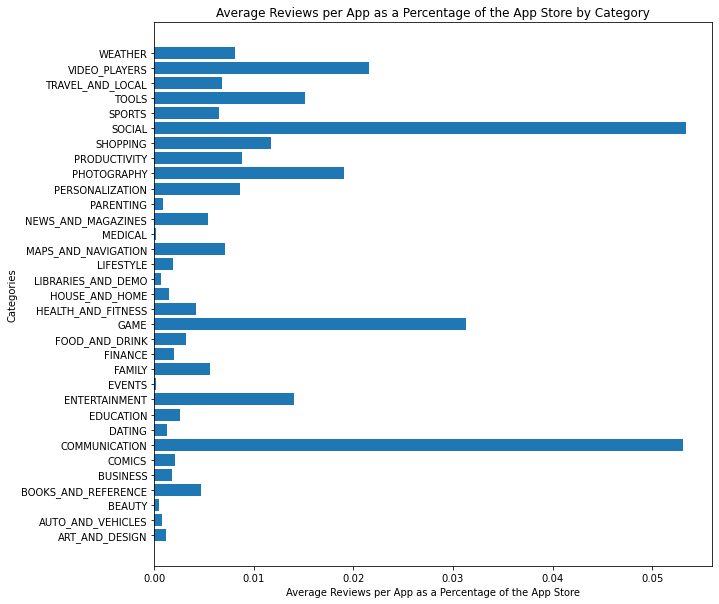

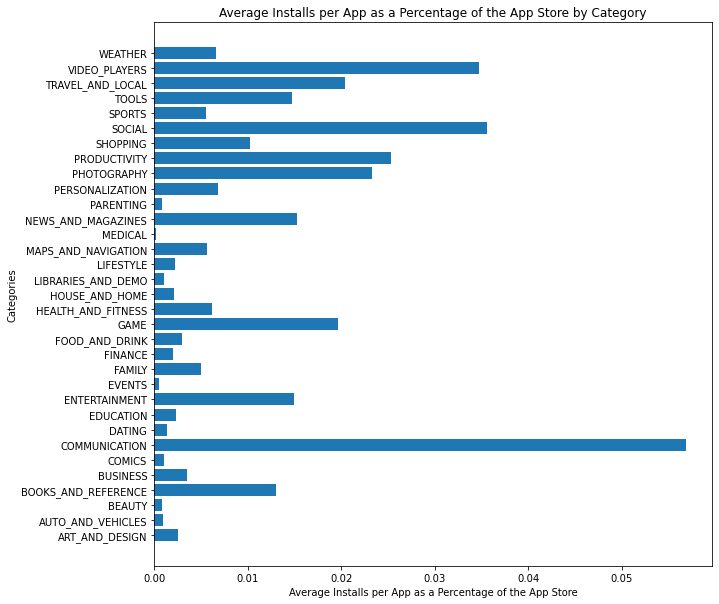

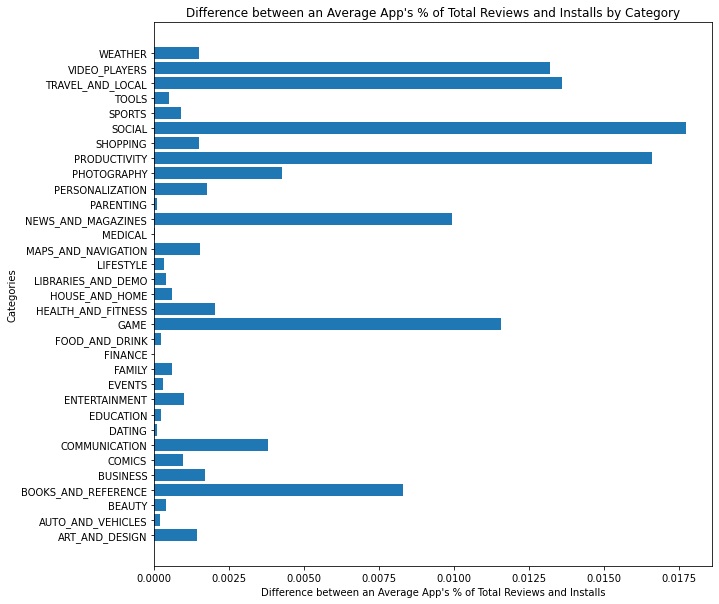

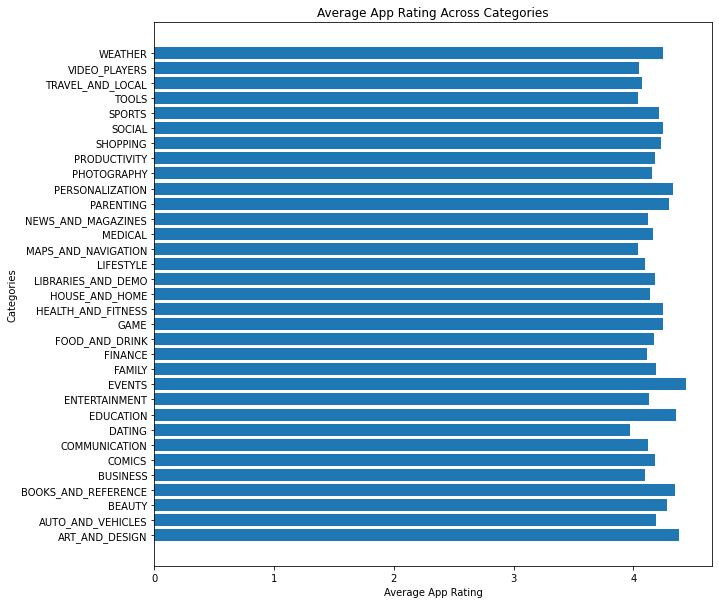

In [7]:
# Next step: make each genre a box and whisker plot to show the actual distribution

# Make a dictionary to store information for a graph
def make_dict(keys):
    Dict = {}
    for i in np.arange(len(keys)): 
        Dict[keys[i]] = 0
    return Dict

category_keys = df["Category"].unique()
category_keys.sort()

# Make a dictionary containing the total number of each type of category
num_dict = make_dict(category_keys)

# Iterate through rows and increment hashes
for index, row in df.iterrows():
    num_dict[(row['Category'])]+= 1

# Make a dictionary containing the total number of reviews for each type of category
category_dict_revs = make_dict(category_keys)

# Iterate through rows and increment hashes
for index, row in df.iterrows():
    category_dict_revs[(row['Category'])]+= row['Reviews']

# Divide each genre's total reviews by the number of apps in the genre to find reviews/app for each genre
# Divide this value by the total number of reviews in the dataset to determine the percentage of the dataset's reviews that 
# go to an average app in a given category
for category in category_dict_revs.keys(): 
    category_dict_revs[category] = 100 * category_dict_revs[category]/num_dict[category]/TOTAL_REVIEWS

# Display Findings
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots()
y_pos = np.arange(len(category_dict_revs.keys()))
ax.set_yticks(y_pos)
ax.set_yticklabels(category_dict_revs.keys())
plt.xlabel("Average Reviews per App as a Percentage of the App Store")
plt.ylabel("Categories")
plt.title("Average Reviews per App as a Percentage of the App Store by Category")
plt.barh(y_pos,category_dict_revs.values())
plt.show()
    
# Make a dictionary containing the total number of installs for each type of category
category_dict_insts = make_dict(category_keys)

# Iterate through rows and increment hashes
for index, row in df.iterrows():
    category_dict_insts[(row['Category'])]+= row['Installs']

# Divide each genre's total installs by the number of apps in the genre to find installs/app for each genre
# Divide this value by the total number of installs in the dataset to determine the percentage of the dataset's installs that 
# go to an average app in a given category
for category in category_dict_insts.keys(): 
    category_dict_insts[category] = 100 * category_dict_insts[category]/num_dict[category]/TOTAL_INSTALLS

# Display Findings
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots()
y_pos = np.arange(len(category_dict_insts.keys()))
ax.set_yticks(y_pos)
ax.set_yticklabels(category_dict_insts.keys())
plt.xlabel("Average Installs per App as a Percentage of the App Store")
plt.ylabel("Categories")
plt.title("Average Installs per App as a Percentage of the App Store by Category")
plt.barh(y_pos,category_dict_insts.values())
plt.show()

# Make a dictionary containing the comparison between install and review percentage
category_dict_comp = make_dict(category_keys)

# Find the difference between each category's average percentage of installs and reviews
for category in category_dict_comp.keys(): 
    category_dict_comp[category] = abs(category_dict_revs[category]-category_dict_insts[category])
    
# Display Findings
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots()
y_pos = np.arange(len(category_dict_comp.keys()))
ax.set_yticks(y_pos)
ax.set_yticklabels(category_dict_comp.keys())
plt.xlabel("Difference between an Average App's % of Total Reviews and Installs")
plt.ylabel("Categories")
plt.title("Difference between an Average App's % of Total Reviews and Installs by Category")
plt.barh(y_pos,category_dict_comp.values())
plt.show()

# Make a new dictionary for the next graph
category_dict_comp = make_dict(category_keys)

# Iterate through rows and increment hashes
for index, row in df.iterrows():
    category_dict_comp[(row['Category'])]+= row['Rating']
    
# Divide each genre's total rating by the number of apps in the genre to find average rating for an app in a genre
for category in category_dict_comp.keys(): 
    category_dict_comp[category] = category_dict_comp[category]/num_dict[category]
    
# Display Findings
fig, ax = plt.subplots()
y_pos = np.arange(len(category_dict_comp.keys()))
ax.set_yticks(y_pos)
ax.set_yticklabels(category_dict_comp.keys())
plt.xlabel("Average App Rating")
plt.ylabel("Categories")
plt.title("Average App Rating Across Categories")
plt.barh(y_pos,category_dict_comp.values())
plt.show()

Above, we perform the same data analysis and display that we performed across genres, but now we perform it across categories. Average Installs/Reviews per App as a Percentage of the App Store by Category shows us yet again that the most individually popular app categories to install and review are the Communication/Social categories, which are very likely associated with the Social Networking Genre above. These apps set the curve for other apps and hold a large share of the installs and reviews while only being a relatively small number of apps on the app store. 

The Difference between an Average App's % of Total Reviews and Installs by Category chart shows us a much higher degree of variance than the same chart by Genre in the previous section. The two categories Social and Productivity in particular fall outside of this 0.015% boundary. The Productivity category is certainly tied to the Productivity Genre, meaning that there are very different amounts of reviews and installs for this type of category/genre in particular. Comparing the differences between the percentage differences between Categories and Genres shows Installs and Reviews tend to agree a little more when using Genres compared to when using Categories. Except for in particular cases, like if you were trying to identify a particular app's category as Finance, I would use Genre as a primary indicator. 

The Average App rating by category shows no difference to the Average App Rating by genre. Like before, it is impossible to predict this variable by using Average App rating. 

From the testing of this independent variable, we've learned that the Social Networking genre, also represented by the Communication/Social categories, contains a small number of apps and a massive number of installs and reviews compared to the rest of the dataset. We've also reiterated that the rating has no connection to the category of an app, with all categories averaging around a 4.0 rating.

### Independent Variable Tested: Content Rating

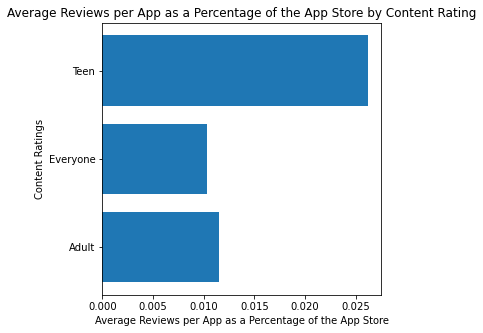

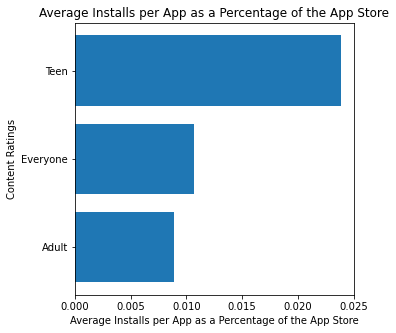

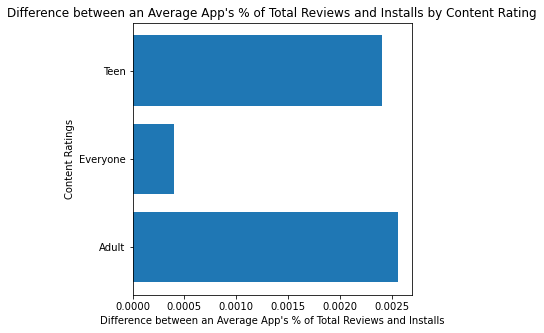

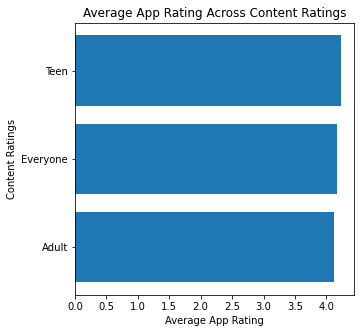

In [8]:
# Content Rating vs targets (get rid of dupes)
# Next step: make each genre a box and whisker plot to show the actual distribution

# Make a dictionary to store num Reviews for a category
def make_dict(keys):
    Dict = {}
    for i in np.arange(len(keys)): 
        Dict[keys[i]] = 0
    return Dict
cr_keys = df["Content Rating"].unique()
cr_keys.sort()

# Make a dictionary containing the total number of each type of content rating
num_dict = make_dict(cr_keys)

# Iterate through rows and increment hashes
for index, row in df.iterrows():
    num_dict[(row['Content Rating'])]+= 1

# Make a dictionary containing the total number of reviews for each type of content rating
cr_dict_revs = make_dict(cr_keys)

# Iterate through rows and increment hashes
for index, row in df.iterrows():
    cr_dict_revs[(row['Content Rating'])]+= row['Reviews']

# Divide each content rating's total reviews by the number of apps in the content rating to find reviews/app for each cr
for cr in cr_dict_revs.keys(): 
    cr_dict_revs[cr] = 100 * cr_dict_revs[cr]/num_dict[cr]/TOTAL_REVIEWS

# Display Findings
plt.rcParams["figure.figsize"] = (5,5)
fig, ax = plt.subplots()
y_pos = np.arange(len(cr_dict_revs.keys()))
ax.set_yticks(y_pos)
ax.set_yticklabels(cr_dict_revs.keys())
plt.xlabel("Average Reviews per App as a Percentage of the App Store")
plt.ylabel("Content Ratings")
plt.title("Average Reviews per App as a Percentage of the App Store by Content Rating")
plt.barh(y_pos,cr_dict_revs.values())
plt.show()

# Make a dictionary containing the total number of installs for each type of category
cr_dict_insts = make_dict(cr_keys)

# Iterate through rows and increment hashes
for index, row in df.iterrows():
    cr_dict_insts[(row['Content Rating'])]+= row['Installs']

# Divide each genre's total installs by the number of apps in the genre to find installs/app for each genre
for cr in cr_dict_insts.keys(): 
    cr_dict_insts[cr] = 100 * cr_dict_insts[cr]/num_dict[cr]/TOTAL_INSTALLS

# Display Findings
fig, ax = plt.subplots()
y_pos = np.arange(len(cr_dict_insts.keys()))
ax.set_yticks(y_pos)
ax.set_yticklabels(cr_dict_insts.keys())
plt.xlabel("Average Installs per App as a Percentage of the App Store")
plt.ylabel("Content Ratings")
plt.title("Average Installs per App as a Percentage of the App Store")
plt.barh(y_pos,cr_dict_insts.values())
plt.show()

# Make a dictionary containing the differences in percentages
cr_dict_comps = make_dict(cr_keys)

# Find the difference between each rating's average percentage of installs and reviews
for cr in cr_dict_comps.keys(): 
    cr_dict_comps[cr] = abs(cr_dict_revs[cr]-cr_dict_insts[cr])
    
# Display Findings
fig, ax = plt.subplots()
y_pos = np.arange(len(cr_dict_comps.keys()))
ax.set_yticks(y_pos)
ax.set_yticklabels(cr_dict_comps.keys())
plt.xlabel("Difference between an Average App's % of Total Reviews and Installs")
plt.ylabel("Content Ratings")
plt.title("Difference between an Average App's % of Total Reviews and Installs by Content Rating")
plt.barh(y_pos,cr_dict_comps.values())
plt.show()

# Make a new dictionary for the next graph
cr_dict_ratings = make_dict(cr_keys)

# Iterate through rows and increment hashes
for index, row in df.iterrows():
    cr_dict_ratings[(row['Content Rating'])]+= row['Rating']
    
# Divide each genre's total rating by the number of apps in the genre to find average rating for an app in a genre
for cr in cr_dict_ratings.keys(): 
    cr_dict_ratings[cr] = cr_dict_ratings[cr]/num_dict[cr]
    
# Display Findings
fig, ax = plt.subplots()
y_pos = np.arange(len(cr_dict_ratings.keys()))
ax.set_yticks(y_pos)
ax.set_yticklabels(cr_dict_ratings.keys())
plt.xlabel("Average App Rating")
plt.ylabel("Content Ratings")
plt.title("Average App Rating Across Content Ratings")
plt.barh(y_pos,cr_dict_ratings.values())
plt.show()

'Difference between an Average App's % of Total Reviews and Installs by Content Rating' is great news for us data analysts. The Installs and the Reviews tell nearly the exact same story in this case, agreeing almost perfectly. CR apps labeled 'Everyone' has the highest degree of accuracy recorded on one of our charts so far. The Teen CR is far away from other CRs and is highly accurate, making this one of the most useful data sorting options. It seems that Teen apps are installed and reviewed far more often (per app) then either Adult apps or Everyone apps. This could be due to extremely popular app categories/genres like social networking being marketed to teens and adults (because these apps are marketed to teens, their CR is often set to Teen but not Everyone because of potentially dangerous content on the site). Once again, the Social Networking apps are extreme outliers, pushing the rest of the apps behind them. 

The Average App Rating Across Content Ratings chart was included to prove that ratings continues to have no effect on the way the data is visualized: the average continues to hover around 4. 

We've learned that Content Ratings is a powerful category, capable of separating the data and identifying Teen apps easily. However, this is likely a result of the influence of Social Media apps skewing the data. 
### Independent Variable Tested: Size 

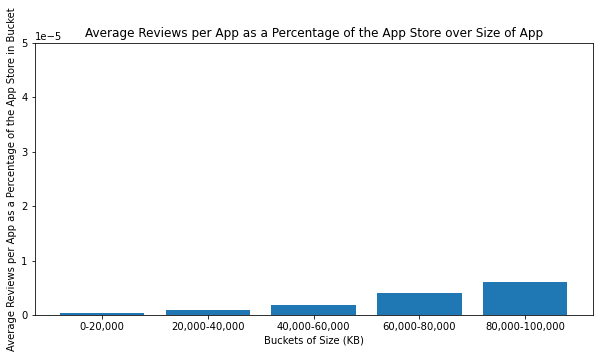

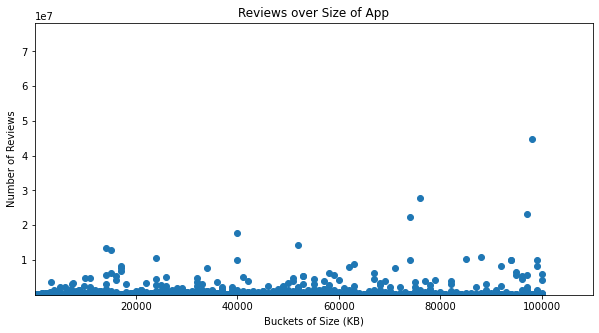

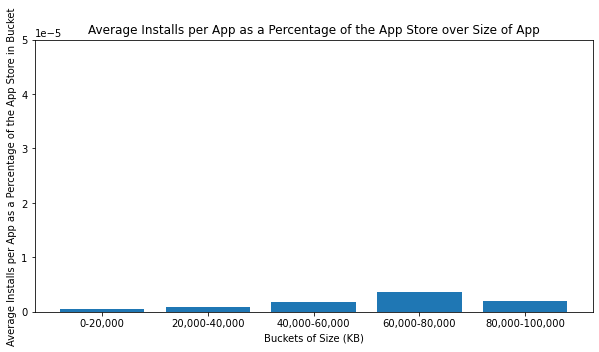

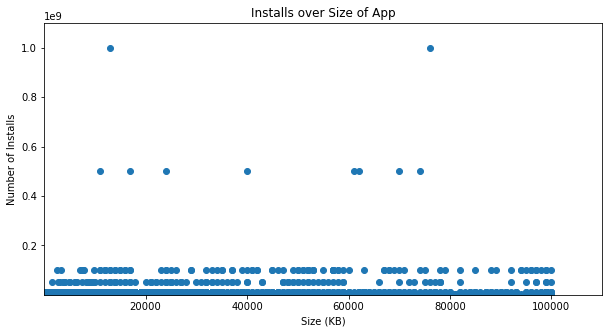

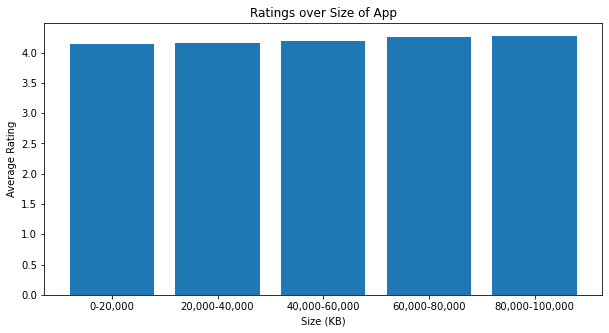

In [9]:
# Iterate over Size values from 0-20k, 20k-40k, 40k-60k, 60k-80k, 80k-100k to make buckets
count = 0
num = [0,0,0,0,0]
total_reviews = [0,0,0,0,0]
total_installs = [0,0,0,0,0]
total_ratings = [0,0,0,0,0]
buckets = [0, 20000, 40000, 60000, 80000, 100000]
for i in np.arange(5): 
    for index, row in df.iterrows():
        if(row['Size']>buckets[i] and row['Size']<buckets[i+1]):
            count+=1
            num[i]+=1
            total_reviews[i]+=row['Reviews']
            total_installs[i]+=row['Installs']
            total_ratings[i]+=row['Rating']

for i in np.arange(5):
    total_reviews[i] = (total_reviews[i]/(count*num[i])/TOTAL_REVIEWS) * 100
    total_installs[i] = (total_installs[i]/(count*num[i])/TOTAL_INSTALLS) * 100
    total_ratings[i] = total_ratings[i]/(num[i])
    
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots()
ax.set(ylim=(0, 0.00005))    
plt.xlabel("Buckets of Size (KB)")
plt.title("Average Reviews per App as a Percentage of the App Store over Size of App")
plt.ylabel("Average Reviews per App as a Percentage of the App Store in Bucket")
plt.bar(["0-20,000", "20,000-40,000", "40,000-60,000", "60,000-80,000", "80,000-100,000"] ,total_reviews);
plt.show()

plt.xlabel("Buckets of Size (KB)")
plt.ylabel("Number of Reviews")
plt.title("Reviews over Size of App")
plt.scatter(df["Size"],df["Reviews"])
plt.xlim(df["Size"].min(), df["Size"].max()+ 10000)
plt.ylim(df["Reviews"].min(), df["Reviews"].max()+ 10000)
plt.show()


fig, ax = plt.subplots()
ax.set(ylim=(0, 0.00005))
plt.xlabel("Buckets of Size (KB)")
plt.title("Average Installs per App as a Percentage of the App Store over Size of App")
plt.ylabel("Average Installs per App as a Percentage of the App Store in Bucket")
plt.bar(["0-20,000", "20,000-40,000", "40,000-60,000", "60,000-80,000", "80,000-100,000"] ,total_installs);
plt.show()


plt.xlabel("Size (KB)")
plt.ylabel("Number of Installs")
plt.title("Installs over Size of App")
plt.scatter(df["Size"],df["Installs"])
plt.xlim(df["Size"].min(), df["Size"].max()+ 10000)
plt.ylim(df["Installs"].min(), df["Installs"].max() + 100000000)
plt.show()


plt.xlabel("Size (KB)")
plt.title("Ratings over Size of App")
plt.ylabel("Average Rating")
plt.bar(["0-20,000", "20,000-40,000", "40,000-60,000", "60,000-80,000", "80,000-100,000"] ,total_ratings);
plt.show()

As the datapoints no longer had categories, I wanted to compare size using five equal buckets. As I suspected, using size as a variable has very little influence on the data as a whole. While I was able to capture the data I needed and the charts show variations, the scale is so small that the data becomes unusable because the averages are so closely clustered. The outliers pull the averages up at times but this dataset is only useful in very few cases. 

We learn nearly nothing about the dataset while looking at this variable's data view. 

### Independent Variable Tested: Price/Is_Free

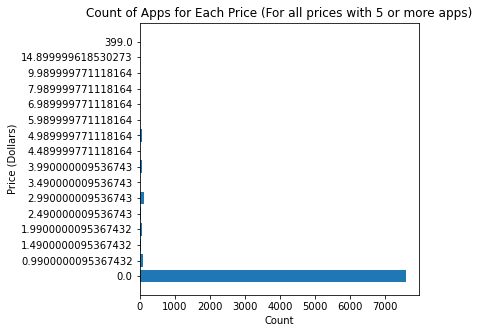

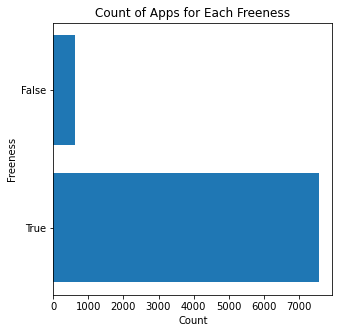

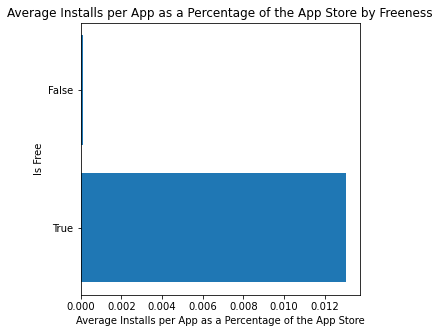

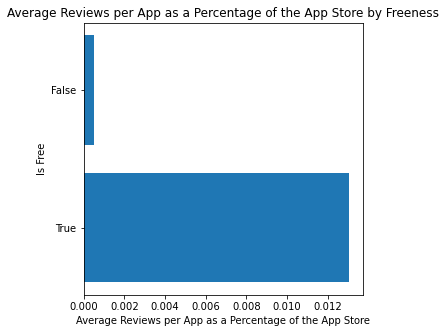

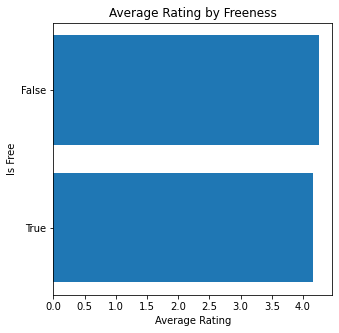

In [10]:
price_dist = df['Price'].unique()
price_dist.sort()

# Make a new dictionary for the next graph
num_dict = make_dict(price_dist)

# Iterate through rows and increment hashes
for index, row in df.iterrows():
    num_dict[(row['Price'])]+= 1

dels = []
for price in num_dict.keys(): 
    if(num_dict[price]<5):
        dels.append(price)

for price in dels:
    del num_dict[price]

# Display Findings
plt.rcParams["figure.figsize"] = (5,5)
fig, ax = plt.subplots()
y_pos = np.arange(len(num_dict.keys()))
ax.set_yticks(y_pos)
ax.set_yticklabels(num_dict.keys())
plt.xlabel("Count")
plt.ylabel("Price (Dollars)")
plt.title("Count of Apps for Each Price (For all prices with 5 or more apps)")
plt.barh(y_pos,num_dict.values())
plt.show()


# Make a dictionary containing the total number of installs for each type of category
num_dict = make_dict([True, False])
isfree_dict_insts = make_dict([True, False])
isfree_dict_revs = make_dict([True, False])
isfree_dict_ratings = make_dict([True, False])

# Iterate through rows and increment hashes
for index, row in df.iterrows():
    num_dict[row['Is_Free']] += 1
    isfree_dict_insts[(row['Is_Free'])]+= row['Installs']
    isfree_dict_revs[(row['Is_Free'])]+= row['Reviews']
    isfree_dict_ratings[(row['Is_Free'])]+= row['Rating']

# Display Findings
fig, ax = plt.subplots()
y_pos = np.arange(len(num_dict.keys()))
ax.set_yticks(y_pos)
ax.set_yticklabels(num_dict.keys())
plt.xlabel("Count")
plt.ylabel("Freeness")
plt.title("Count of Apps for Each Freeness")
plt.barh(y_pos,num_dict.values())
plt.show()

# Divide each genre's total installs by the number of apps in the genre to find installs/app for each genre
for is_free in isfree_dict_insts.keys(): 
    isfree_dict_insts[is_free] = 100 * isfree_dict_insts[is_free]/num_dict[is_free]/TOTAL_INSTALLS

# Display Findings
fig, ax = plt.subplots()
y_pos = np.arange(len(isfree_dict_insts.keys()))
ax.set_yticks(y_pos)
ax.set_yticklabels(isfree_dict_insts.keys())
plt.xlabel("Average Installs per App as a Percentage of the App Store")
plt.ylabel("Is Free")
plt.title("Average Installs per App as a Percentage of the App Store by Freeness")
plt.barh(y_pos,isfree_dict_insts.values())
plt.show()

# Divide each genre's total installs by the number of apps in the genre to find installs/app for each genre
for is_free in isfree_dict_revs.keys(): 
    isfree_dict_revs[is_free] = 100 * isfree_dict_revs[is_free]/num_dict[is_free]/TOTAL_REVIEWS

# Display Findings
fig, ax = plt.subplots()
y_pos = np.arange(len(isfree_dict_revs.keys()))
ax.set_yticks(y_pos)
ax.set_yticklabels(isfree_dict_revs.keys())
plt.xlabel("Average Reviews per App as a Percentage of the App Store")
plt.ylabel("Is Free")
plt.title("Average Reviews per App as a Percentage of the App Store by Freeness")
plt.barh(y_pos,isfree_dict_revs.values())
plt.show()


# Divide each genre's total installs by the number of apps in the genre to find installs/app for each genre
for is_free in isfree_dict_ratings.keys(): 
    isfree_dict_ratings[is_free] = isfree_dict_ratings[is_free]/num_dict[is_free]

# Display Findings
fig, ax = plt.subplots()
y_pos = np.arange(len(isfree_dict_ratings.keys()))
ax.set_yticks(y_pos)
ax.set_yticklabels(isfree_dict_ratings.keys())
plt.xlabel("Average Rating")
plt.ylabel("Is Free")
plt.title("Average Rating by Freeness")
plt.barh(y_pos,isfree_dict_ratings.values())
plt.show()

In the examination of the values "Is_Free" and "Price", we run into issues with the size of the population. The vast majority of the apps on the app store are free so taking data measurements of this population is practically the same as finding measures of center for the entire population, which is unhelpful when we are looking at specific trends in the data. However, the data shows that the few apps that are not free have far fewer installs and reviews; this is a tentatively useful trend. We can operate with the assumption that most apps are free and those that are not are far more likely to be at the lower end of installs/reviews. 

Strangely, the paid apps have around the same rating as the free ones. This continues the trend of rating being an not useful numerical variable.
### Independent Variable Tested: Last Updated

In [11]:
s = pd.cut(df['Last Updated'], bins=3, retbins=True, right=True)
s[1]

DatetimeIndex(['2010-05-17 23:58:33.600000',        '2013-02-14 08:00:00',
                      '2015-11-11 16:00:00',        '2018-08-08 00:00:00'],
              dtype='datetime64[ns]', freq=None)

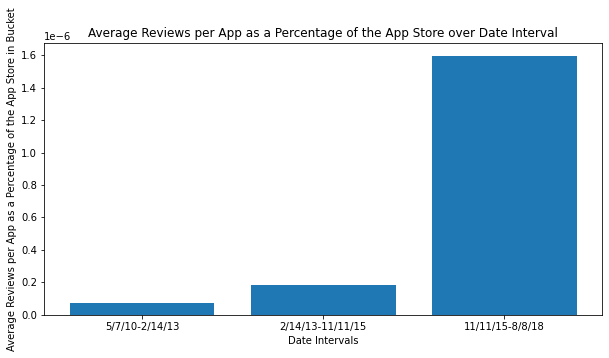

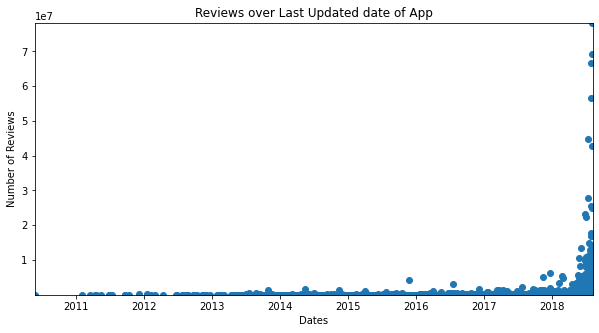

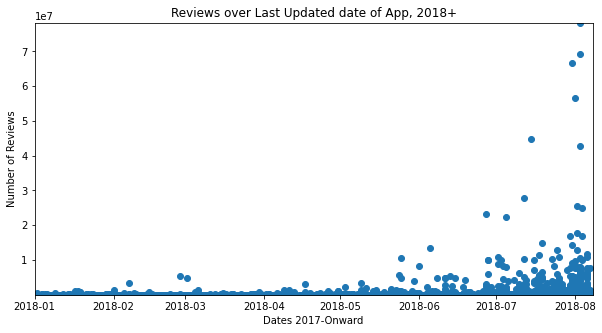

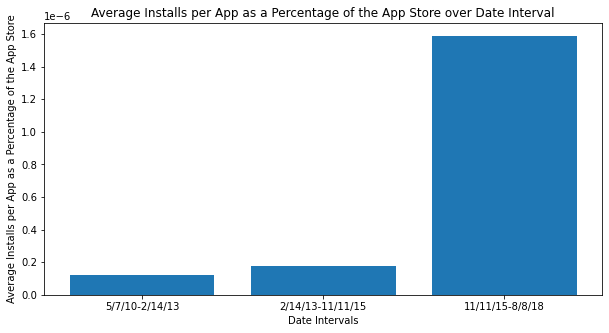

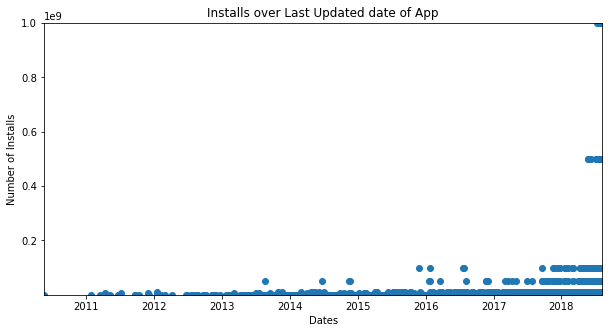

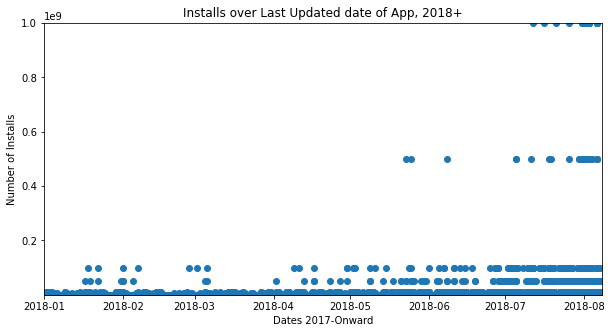

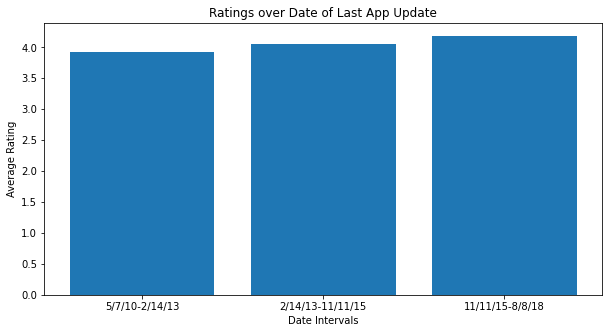

In [12]:
# Iterate over Last Updated values and make buckets from the intervals above
count = 0
num = [0,0,0]
total_reviews = [0,0,0]
total_installs = [0,0,0]
total_ratings = [0,0,0]
buckets = [datetime.datetime(2010, 5, 17, 23, 58, 33, 600000),
           datetime.datetime(2013, 2, 14, 8, 0, 0),
           datetime.datetime(2015, 11, 11, 16, 0, 0), 
           datetime.datetime(2018, 8, 8, 0, 0, 0)]
for i in np.arange(3): 
    for index, row in df.iterrows():
        if(row['Last Updated']>=buckets[i] and row['Last Updated']<buckets[i+1]):
            count+=1
            num[i]+=1
            total_reviews[i]+=row['Reviews']
            total_installs[i]+=row['Installs']
            total_ratings[i]+=row['Rating']

for i in np.arange(3):
    total_reviews[i] = (total_reviews[i]/(count*num[i])/TOTAL_REVIEWS) * 100
    total_installs[i] = (total_installs[i]/(count*num[i])/TOTAL_INSTALLS) * 100
    total_ratings[i] = total_ratings[i]/(num[i])
    
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots()
plt.xlabel("Date Intervals")
plt.title("Average Reviews per App as a Percentage of the App Store over Date Interval")
plt.ylabel("Average Reviews per App as a Percentage of the App Store in Bucket")
plt.bar(["5/7/10-2/14/13", "2/14/13-11/11/15", "11/11/15-8/8/18"] ,total_reviews)
plt.show()

plt.xlabel("Dates")
plt.ylabel("Number of Reviews")
plt.title("Reviews over Last Updated date of App")
plt.scatter(df["Last Updated"],df["Reviews"])
plt.xlim(df["Last Updated"].min(), df["Last Updated"].max())
plt.ylim(df["Reviews"].min(), df["Reviews"].max())
plt.show()

plt.xlabel("Dates 2017-Onward")
plt.ylabel("Number of Reviews")
plt.title("Reviews over Last Updated date of App, 2018+")
plt.scatter(df["Last Updated"],df["Reviews"])
plt.xlim(datetime.datetime(2018, 1, 1), df["Last Updated"].max())
plt.ylim(df["Reviews"].min(), df["Reviews"].max())
plt.show()

fig, ax = plt.subplots()
plt.xlabel("Date Intervals")
plt.title("Average Installs per App as a Percentage of the App Store over Date Interval")
plt.ylabel("Average Installs per App as a Percentage of the App Store")
plt.bar(["5/7/10-2/14/13", "2/14/13-11/11/15", "11/11/15-8/8/18"] ,total_installs);
plt.show()

plt.xlabel("Dates")
plt.ylabel("Number of Installs")
plt.title("Installs over Last Updated date of App")
plt.scatter(df["Last Updated"],df["Installs"])
plt.xlim(df["Last Updated"].min(), df["Last Updated"].max())
plt.ylim(df["Installs"].min(), df["Installs"].max())
plt.show()

plt.xlabel("Dates 2017-Onward")
plt.ylabel("Number of Installs")
plt.title("Installs over Last Updated date of App, 2018+")
plt.scatter(df["Last Updated"],df["Installs"])
plt.xlim(datetime.datetime(2018, 1, 1), df["Last Updated"].max())
plt.ylim(df["Installs"].min(), df["Installs"].max())
plt.show()

plt.xlabel("Date Intervals")
plt.title("Ratings over Date of Last App Update")
plt.ylabel("Average Rating")
plt.bar(["5/7/10-2/14/13", "2/14/13-11/11/15", "11/11/15-8/8/18"],total_ratings);
plt.show()

The Last Updated variable shares a surprising depth of information about the dataset. Overwhelmingly, apps last updated later on in the graph displayed higher average installs and reviews than the intervals before. This variable is so impactful that it alters the ratings chart, something no other variable has been able to do, showing a gradual increase in ratings over time. 

This variable is likely so powerful due to the implication that apps updated more recently are more likely to be popular apps that are used often. Social Networking apps, the most popular genre of app, are frequently updated so they would fall in the rightmost column with the other apps that are frequently updateddd. Meanwhile, older apps that aren't updated anymore and likely have a small/nonexistent userbase would decline in installs and reviews, causing the earlier columns of the charts to be smaller. 

The scatterplots give us another visual indication of the popularity of apps. We've done two versions of each scatterplot to show the difference in trends between "Recently Updated" apps and the app store as a whole. The Recently Updated apps tell a completely different story than the apps that are out of date. Last Updated will be a powerful tool to use in our predictions when we implement Multivariable Linear Regression in the next section. 

Now that we have shown that no categorization technique has any significant effect on rating (except for Last Updated), we can attempt to make use of Rating as an independent variable to potentially predict Installs and Reviews.

## Conclusion/Insight Section
Condense what we've been saying about how some variables are useful and others aren't to predict this next part. 

This is a summary of what the data really MEANT and a summary of what we discovered. In the next part, we will do a condensed exploration of what our variable for ML is. 

# Machine Learning
### Making a Tidy Dataset Usable in Machine Learning 

While the dataset above is tidy, it is not quite usable in machine learning. Some of the most important fields, Genre and Content Rating, are both strings but need to be encoded as integers so a regression algorithm can use them as input. This will especially help with the encoding of Genre, which may have two possible values at once. 


To do this, we use <a href="https://www.displayr.com/what-are-dummy-variables/"> dummy variables</a>, which count on the observed value being one of a few distinct values. 

For Content Rating, this would be Content Rating = Everyone, Content Rating = Teen, and Content Rating = Adult. We take the one Content Rating Column and split it into three columns: the three possible observed values. The observed values for these columns would be 0 if the matching value is not observed and 1 if it is. 

Genre follows the same principle but with the caveat that there may be one or two genres for one app. There are 8 possible observed values. Therefore, for every app there will 1 observation and 7 abscences OR 2 observations and 6 abscences.

After we organize Genre and Content Rating, we will split the dataset into two different parts: the training set and the testing set. The training set is used to help the model "learn" about the dataset and get an "idea" of how the dataset looks so it can predict values. Then we compare this to the data we've kept in reserve, the testing dataset, to determine how effectively the model predicts the data. 

In [22]:
# A copy of the df that will be used for machine learning
# We use genre_df because it contains duplicates that have different genres, which we will use here
ml_df = genre_df.copy()

# Create dummy variables for content rating and remove column of strings
dummy_df = pd.get_dummies(ml_df[["Content Rating"]])
ml_df = pd.concat([ml_df, dummy_df], axis=1)
ml_df = ml_df.drop(["Content Rating"], axis=1)

# Create dummy variables for genre and remove column of strings
dummy_df = pd.get_dummies(ml_df[["Genre"]])
ml_df = pd.concat([ml_df, dummy_df], axis=1)
ml_df = ml_df.drop(["Genre"], axis=1)

# Combine duplicate apps together in ml dataset
ml_df = ml_df.groupby(['App'], as_index=False).agg({'App': 'first', 'Category': 'first',
                                              'Rating': 'first', 'Reviews': 'first',
                                              'Size': 'first', 'Installs': 'first',
                                              'Is_Free': 'first', 'Price': 'first',
                                              'Size': 'first', 'Content Rating_Adult': 'first',
                                              'Content Rating_Everyone': 'first', 'Content Rating_Teen': 'first',
                                              'Last Updated': 'first', 'Genre_Creativity': 'sum',
                                              'Genre_Education': 'sum', 'Genre_Entertainment': 'sum',
                                              'Genre_Games': 'sum', 'Genre_Lifestyle': 'sum',
                                              'Genre_Productivity': 'sum', 'Genre_Social Networking': 'sum',
                                              'Genre_Utilities': 'sum'})
ml_df = ml_df.sort_values(by = ['Installs'], ascending=False)

# Create dummy variables for category and remove column of strings
dummy_df = pd.get_dummies(ml_df[["Category"]])
ml_df = pd.concat([ml_df, dummy_df], axis=1)
ml_df = ml_df.drop(["Category"], axis=1)

# fix the double counting: if a dummy var has a 2, make it a 1 
for index, row in ml_df.iterrows():
    if(row['Genre_Creativity']==2):
        ml_df['Genre_Creativity'][index] = 1
    if(row['Genre_Education']==2):
        ml_df['Genre_Education'][index] = 1
    if(row['Genre_Entertainment']==2):
        ml_df['Genre_Entertainment'][index] = 1
    if(row['Genre_Games']==2):
        ml_df['Genre_Games'][index] = 1
    if(row['Genre_Lifestyle']==2):
        ml_df['Genre_Lifestyle'][index] = 1
    if(row['Genre_Productivity']==2):
        ml_df['Genre_Productivity'][index] = 1
    if(row['Genre_Social Networking']==2):
        ml_df['Genre_Social Networking'][index] = 1
    if(row['Genre_Utilities']==2):
        ml_df['Genre_Utilities'][index] = 1

# Convert the "Last Updated" to an integer value so it can be understood by the regression model
ml_df = ml_df.astype({'Last Updated': 'long'})

# Convert the "Last Updated" to an integer value so it can be understood by the regression model
ml_df = ml_df.astype({'Last Updated': 'long'})

for index, row in ml_df.iterrows():
    if(row['Is_Free']==True):
        ml_df['Is_Free'][index] = 1
    else:
        ml_df['Is_Free'][index] = 0

# We can also set a seed that we can return to, but I don't know why we'd need that. 
train, test = train_test_split(ml_df, test_size=0.3)

## Determining What The Response Variable Will Be
To determine the response variable, we need to compare the conclusions drawn above. In this section, use rating to compare reviews and installs and either use it as a predictor or not. 

I can see us using Ratings and Installs as well as the other variables to predict a category. For example: Is this a social networking app or nah? Since they are such outliers it would be easy to do. 

If our target variable is still "Success", we could try the buckets of reviews because that variable has been pretty good so far. Beyond here im not sure but I'd like to see what you think about it. I'll update the parts above tomorrow and finish the ML Wednesday morning. 

Henry 12/16: Right now just working with Reviews as a target variable. Found things less awkward to work with then Installs. If you'd like to change it feel free. I feel like we have enough evidence on what we've already done. The problem with using Regression on Installs is that we won't really get any valuable residuals to improve our model since it's values are so limited. The problem with using decision trees is that our categories aren't decisive enough. Might move graphs from 12/13 here. Honestly at this point I'm more willing to argue that reviews are more important towards "sucess" beacuse of user engagement then I am to work with scuffed models. If you find a model that works with Installs I'd be glad to use it.

In the above section, address: comparing rating and installs with reviews, which we've chosen as our target variable because the number of reviews is related to the success of an app: its high degree of user engagement. Apps with more reviews are pushed to the front of the app store and recommended to consumers because the app has convinced its users that it is worth advising others to check it out. As the "rating" variable has shown throughout this exploration process, the rating that the user gives the app doesn't really matter, as all the ratings will tend to converge around 4.0; by ignoring the rating given by the review and focusing on the number of reviews, it is easy to see that the number of reviews correlates with the number of people who use the app frequently and will share this app with people around them, contributing more to the app's success.

In addition to the qualitative factors around choosing "Reviews" as a target variable synonymous with the "success and popularity" of an app, the Reviews variable is continuous and has shown noticable changes between categories as we've manipulated the data above. It has some significant outliers that must be dealt with but aside from this, it is the ideal variable to predict in machine learning for this data set to further our goal.  

## Dealing With Our Exponentially Increasing Variables

Right now our two most important numerical values are installs and reviews. However it won't take long to realise that these variables are difficult to work with.

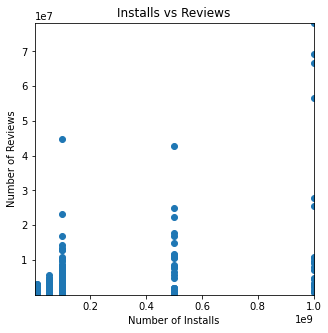

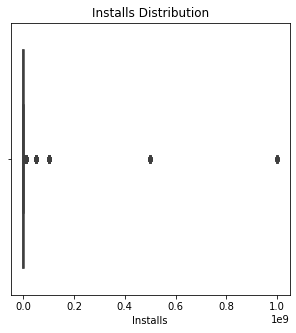

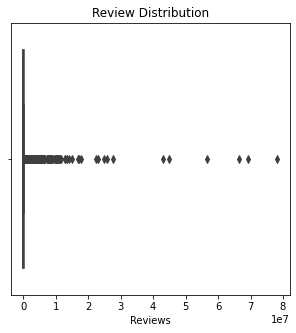

In [14]:
plt.rcParams["figure.figsize"] = (5,5)
plt.xlabel("Number of Installs")
plt.ylabel("Number of Reviews")
plt.title("Installs vs Reviews")
plt.scatter(ml_df["Installs"],ml_df["Reviews"])
plt.xlim(ml_df["Installs"].min(), ml_df["Installs"].max())
plt.ylim(ml_df["Reviews"].min(), ml_df["Reviews"].max())
plt.show();


ax = sns.boxplot(x=ml_df["Installs"])
plt.title('Installs Distribution');
plt.show()

ax = sns.boxplot(x=ml_df["Reviews"])
plt.title('Review Distribution');
plt.show()

This is due to their tendency to exponentally grow apart from each other, making our distributions really awkward.

In addition, it is important to realize that while Installs is a numerical variable, it behaves like a categorical variable, using extremely rough minimum values to estimate the actual value of installs. This is noticable in the "Installs vs Reviews" graph above as Reviews values are spread out along the y axis but the Installs values are all one of a handful of values. This is one of the reasons we picked Reviews as our measure of success for an app and not Installs. 

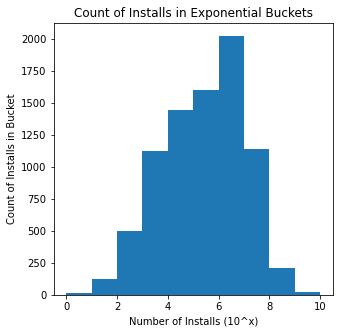

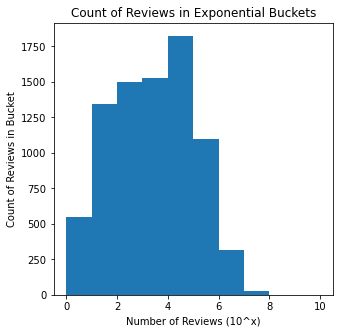

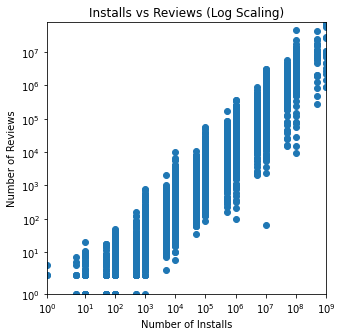

In [15]:
plt.xlabel("Number of Installs (10^x)")
plt.title("Count of Installs in Exponential Buckets")
plt.ylabel("Count of Installs in Bucket")
plt.hist(df["Installs"].apply(lambda x: math.log10(x + 1)), bins=[0,1,2,3,4,5,6,7,8,9,10]);
plt.show()

plt.xlabel("Number of Reviews (10^x)")
plt.title("Count of Reviews in Exponential Buckets")
plt.ylabel("Count of Reviews in Bucket")
plt.hist(df["Reviews"].apply(lambda x: math.log10(x + 1)), bins=[0,1,2,3,4,5,6,7,8,9,10]);
plt.show()

x = df['Installs'].values
y = df['Reviews'].values
x = x.reshape(len(df['Installs']), 1)
y = y.reshape(len(df['Reviews']), 1)

plt.xlabel("Number of Installs")
plt.ylabel("Number of Reviews")
plt.title("Installs vs Reviews (Log Scaling)")
plt.scatter(df["Installs"],df["Reviews"])
plt.xlim(df["Installs"].min(), df["Installs"].max())
plt.ylim(df["Reviews"].min(), df["Reviews"].max())
plt.xscale('symlog')
plt.yscale('symlog')
#If we use this graph in the final product scales need to be adjusted.
plt.show()

When we adjust our scale logarithmically to adjust for growth our graphs start become a lot more readable. 

Scaling how we graph isn't enough though. As we can see below when trying to fit a linear regression model onto our exponentially increasing variables it over influences our model. We will begin linear regression using Installs as our independent variable and Reviews as our target variable. 

## Applying a Linear Regression Model

y = x0.02089 + 5.499e+04


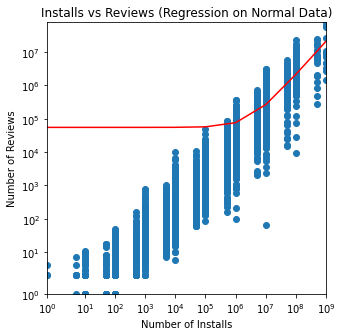

In [16]:
Y = train[["Reviews"]]
X = train[["Installs"]]
regression_model = linear_model.LinearRegression()
regression_model.fit(X, Y)

intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]
print("y = x{:.4} + {:.4}".format(coefficent,intercept))

plt.xlabel("Number of Installs")
plt.ylabel("Number of Reviews")
plt.title("Installs vs Reviews (Regression on Normal Data)")
plt.scatter(train["Installs"],train["Reviews"])
plt.xlim(train["Installs"].min(),train["Installs"].max())
plt.ylim(train["Reviews"].min(), train["Reviews"].max())
plt.xscale('symlog')
plt.yscale('symlog')

xr= np.array ([1,10,10**3,10**4,10**5,10**6,10**7,10**8,10**9])
plt.plot(xr, coefficent*xr + intercept, color='red', label="Regression Line")
plt.show()

One of the ways we can fix this is by scaling all of our data down by taking the log of it. This turn our exponential into linear which means we can now run linear regressions on it.

(If you can find a better way to do this, please feel free to change this part. I tried for an hour or so trying to see if I could work different versions of polynomial/logrithmic regressions to see if it would work better. I couldn't find a exponental regression or anything like that, but I can't help like feeling we might be missing some stat trick. Right now this just seems like the easiest solution to having coherent model.)

y = x0.9461 + -1.442


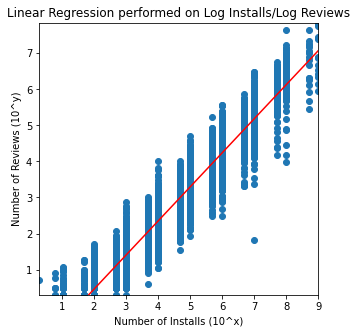

In [23]:
#Change to this code if you want log dataframe to be seprate
#log10_df = ml_df.copy()
#log10_df["Log Installs"] = log10_df["Installs"].apply(lambda x: math.log10(x + 1))
#log10_df["Log Reviews"] = log10_df["Reviews"].apply(lambda x: math.log10(x + 1))
#log10_df.head()

train["Log Installs"] = train["Installs"].apply(lambda x: math.log10(x + 1))
train["Log Reviews"] = train["Reviews"].apply(lambda x: math.log10(x + 1))

test["Log Installs"] = test["Installs"].apply(lambda x: math.log10(x + 1))
test["Log Reviews"] = test["Reviews"].apply(lambda x: math.log10(x + 1))

Y = train[["Log Reviews"]]
X = train[["Log Installs"]]
regression_model = linear_model.LinearRegression()
regression = regression_model.fit(X, Y)

intercept = regression.intercept_[0]
coefficent = regression.coef_[0][0]
print("y = x{:.4} + {:.4}".format(coefficent,intercept))

plt.xlabel("Number of Installs (10^x)")
plt.ylabel("Number of Reviews (10^y)")
plt.title("Linear Regression performed on Log Installs/Log Reviews")
plt.scatter(train["Log Installs"],train["Log Reviews"])
plt.xlim(train["Log Installs"].min(), train["Log Installs"].max())
plt.ylim(train["Log Reviews"].min(), train["Log Reviews"].max())

xr= np.array([1,2,3,4,5,6,7,8,9])
plt.plot(xr, coefficent*xr + intercept, color='red', label="Regression Line")
plt.show()

Now our graph is readable and our model seems to fit the average of our data. We can describe the type and amount of error we are getting by using residuals, a measure of how far the datapoints of our population are from the regression line. 


Our model is far from perfect and we are still getting a lot of error. This means that there are other factors driving our data in different directions. From our exploratory analysis we have a good idea of what some of these factors are. Let's start with genre and see if Social Networking is having the pull we predicted.

Mean Squared Error for Linear Regression model:  3307758076092


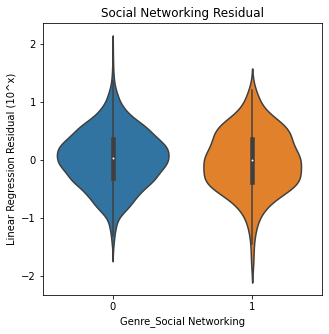

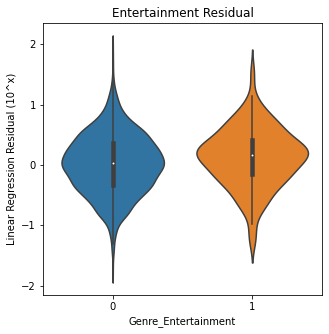

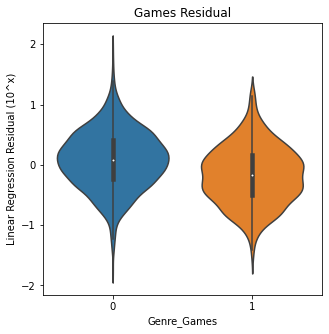

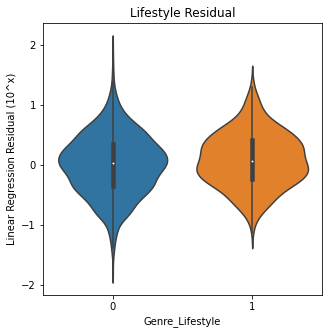

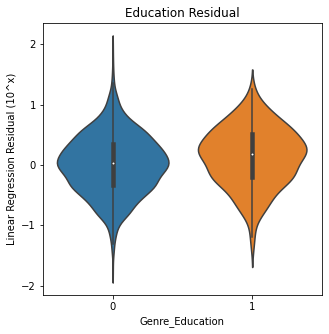

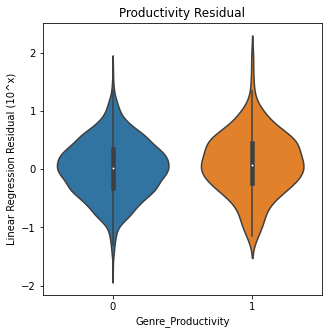

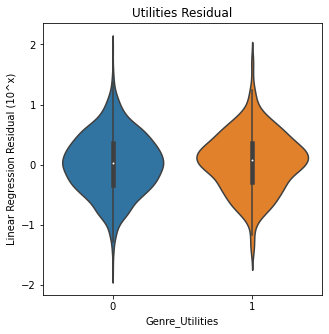

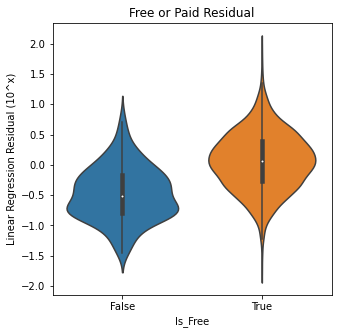

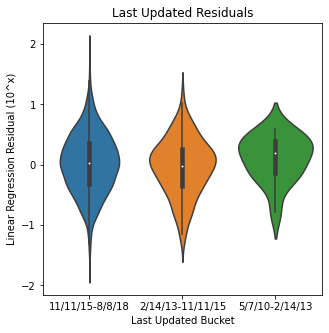

In [18]:
test["Linear Regression Residual (10^x)"] = test.apply(lambda row: (coefficent * row['Log Installs'] + 
                                                  intercept) - row['Log Reviews'], axis=1)

# Store the mean squared error to compare this model to later models
squared_error = test.apply(lambda row: (10**(coefficent * row['Log Installs'] + intercept) - row['Reviews'])**2, axis=1)
mse_linear_regression = (squared_error.sum()/len(squared_error))
print("Mean Squared Error for Linear Regression model: ", round(mse_linear_regression))

# Make these plots smaller 
plt.title("Social Networking Residual")
vp = sns.violinplot(x="Genre_Social Networking", y="Linear Regression Residual (10^x)",data=test)
plt.show()
plt.title("Entertainment Residual")
vp = sns.violinplot(x="Genre_Entertainment", y="Linear Regression Residual (10^x)",data=test)
plt.show()
plt.title("Games Residual")
vp = sns.violinplot(x="Genre_Games", y="Linear Regression Residual (10^x)",data=test)
plt.show()
plt.title("Lifestyle Residual")
vp = sns.violinplot(x="Genre_Lifestyle", y="Linear Regression Residual (10^x)",data=test)
plt.show()
plt.title("Education Residual")
vp = sns.violinplot(x="Genre_Education", y="Linear Regression Residual (10^x)",data=test)
plt.show()
plt.title("Productivity Residual")
vp = sns.violinplot(x="Genre_Productivity", y="Linear Regression Residual (10^x)",data=test)
plt.show()
plt.title("Utilities Residual")
vp = sns.violinplot(x="Genre_Utilities", y="Linear Regression Residual (10^x)",data=test)
plt.show()
plt.title("Free or Paid Residual")
vp = sns.violinplot(x="Is_Free", y="Linear Regression Residual (10^x)",data=test)
plt.show()

def bucket_datetime(date):
    if date >= datetime.datetime(2015, 11, 11):
        ret = "11/11/15-8/8/18"
    elif date >= datetime.datetime(2013, 2, 14):
        ret = "2/14/13-11/11/15"
    else:
        ret = "5/7/10-2/14/13"
    return ret

# Quickly convert the Last Updated column back to use the dates in buckets 
test = test.astype({'Last Updated': 'datetime64[ns]'})

test["Last Updated Bucket"] = test.apply(lambda row: bucket_datetime(row["Last Updated"]), axis=1)
plt.title("Last Updated Residuals")
vp = sns.violinplot(x="Last Updated Bucket", y="Linear Regression Residual (10^x)",data=test)
plt.show()
test.drop(["Last Updated Bucket"], axis=1);

#Convert back to use in ML
test = test.astype({'Last Updated': 'long'})

As we can see from these graphs of residuals, there is quite a large average distance from our residual line to our data. This means that while our residual follows our data, it is currently not matching the data well. Besides from looking at the graphs, we can tell this by looking at the Mean Squared Error, the average distance between the regression line and the datapoints. We will compare this to other models that we will try to fit the data with. 

This could be because the regression model is currently underfitted (The model isn't following the data closely enough), the linear model is being dragged off course by powerful outliers within the data set, and/or it is impossible to plot an accurate regression line between these two variables because Installs cannot accurately predict Reviews. To address, the issue of underfitting, let's try a different model, where we attempt to identify our model as a polynomial regression model and match it. 

## Applying a Polynomial Regression Model

In this model, we will use Installs as our independent variable from the dataset to predict our target variable, Installs. 
We will be applying many of the same ideas above, but attempting to fit for a curved model. 

y = 0.04529x^2 + 0.5008x + 0.01 + -0.4654


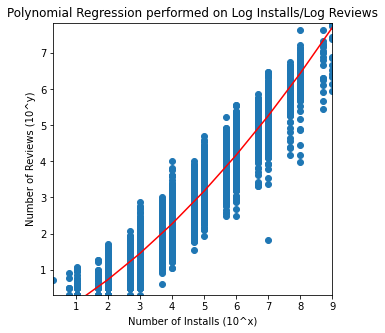

Mean Squared Error for Multiple Linear Regression model:  5763284759315
Mean Squared Error for          Linear Regression model:  5763284759315
MSE Improvement 0.0


In [53]:
from sklearn.preprocessing import PolynomialFeatures
Y = train[["Log Reviews"]]
X = train[["Log Installs"]]

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
regression = LinearRegression()
regression.fit(X_poly, Y)

plt.xlabel("Number of Installs (10^x)")
plt.ylabel("Number of Reviews (10^y)")
plt.title("Polynomial Regression performed on Log Installs/Log Reviews")
plt.scatter(train["Log Installs"],train["Log Reviews"])
plt.xlim(train["Log Installs"].min(), train["Log Installs"].max())
plt.ylim(train["Log Reviews"].min(), train["Log Reviews"].max())

intercept = regression.intercept_[0]
coefficents = regression.coef_[0]
print("y = {:.4}x^2 + {:.4}x + {:.4}1 + {:.4}".format(coefficents[2],coefficents[1],coefficents[0],intercept))

xr= np.array([1,2,3,4,5,6,7,8,9])
plt.plot(xr, coefficents[2]*(xr**2) + coefficents[1]*xr + coefficents[0]+ intercept, color='red', label="Regression Line")
plt.show()

# Store the mean squared error to compare this model to later models
squared_error = test.apply(lambda row: (10**((coefficents[2]*(row['Log Installs']**2)) + 
                                             (coefficents[1]*(row['Log Installs'])) + 
                                              (coefficents[0] + intercept)) - row['Reviews'])**2, axis=1)
mse_poly_regression = (squared_error.sum()/len(squared_error))
print("Mean Squared Error for Multiple Linear Regression model: ", round(mse_poly_regression))
print("Mean Squared Error for          Linear Regression model: ", round(mse_linear_regression))
print("MSE Improvement", (mse_linear_regression-mse_poly_regression))

I'm gonna be honest, I don't know what happened here. The fact that the numbers were the exact same is pretty wild, tbh. 

## Applying a Multiple Linear Regression Model
In this model, we use multiple independent variables from the dataset to predict our target variable. 

From our dataset, we will choose our independent variables from the information we learned during Data Exploration. 

We will use installs, genre, content rating, is_free, and last_updated to predict reviews. 

In [35]:
Y = train[["Reviews"]]
X = train[["Installs","Is_Free", 'Category_SOCIAL', 'Category_COMICS', 'Category_TOOLS',
       'Category_COMMUNICATION', 'Category_NEWS_AND_MAGAZINES',
       'Category_SPORTS', 'Category_HEALTH_AND_FITNESS',
       'Category_FAMILY', 'Category_BOOKS_AND_REFERENCE',
       'Category_LIFESTYLE', 'Category_BUSINESS', 'Category_SHOPPING',
       'Category_MEDICAL', 'Category_GAME', 'Category_PERSONALIZATION',
       'Category_PHOTOGRAPHY', 'Category_TRAVEL_AND_LOCAL',
       'Category_DATING', 'Category_PRODUCTIVITY',
       'Category_ART_AND_DESIGN', 'Category_FOOD_AND_DRINK',
       'Category_VIDEO_PLAYERS', 'Category_HOUSE_AND_HOME',
       'Category_MAPS_AND_NAVIGATION', 'Category_FINANCE',
       'Category_EDUCATION', 'Category_AUTO_AND_VEHICLES',
       'Category_WEATHER', 'Category_BEAUTY', 'Category_ENTERTAINMENT',
       'Category_EVENTS', 'Category_LIBRARIES_AND_DEMO',
       'Category_PARENTING','Content Rating_Adult','Content Rating_Everyone', 'Content Rating_Teen',
          'Last Updated', 'Genre_Social Networking', 'Genre_Entertainment',
       'Genre_Utilities', 'Genre_Lifestyle', 'Genre_Games',
       'Genre_Education', 'Genre_Productivity', 'Genre_Creativity']]

regression_model = linear_model.LinearRegression()
regression = regression_model.fit(X, Y)

intercept = regression.intercept_[0]
coefficent = regression.coef_[0]

# Store the mean squared error to compare this model to later models
squared_error = test.apply(lambda row: ((coefficent[0]*row['Installs'])+
                                        (coefficent[1]*row['Is_Free'])+
                                        (coefficent[2]*row['Category_SOCIAL'])+
                                        (coefficent[3]*row['Category_COMICS'])+
                                        (coefficent[4]*row['Category_TOOLS'])+
                                        (coefficent[5]*row['Category_COMMUNICATION'])+
                                        (coefficent[6]*row['Category_NEWS_AND_MAGAZINES'])+
                                        (coefficent[7]*row['Category_SPORTS'])+
                                        (coefficent[8]*row['Category_HEALTH_AND_FITNESS'])+
                                        (coefficent[9]*row['Category_FAMILY'])+
                                        (coefficent[10]*row['Category_BOOKS_AND_REFERENCE'])+
                                        (coefficent[11]*row['Category_LIFESTYLE'])+
                                        (coefficent[12]*row['Category_BUSINESS'])+
                                        (coefficent[13]*row['Category_SHOPPING'])+
                                        (coefficent[14]*row['Category_MEDICAL'])+
                                        (coefficent[15]*row['Category_GAME'])+
                                        (coefficent[16]*row['Category_PERSONALIZATION'])+
                                        (coefficent[17]*row['Category_PHOTOGRAPHY'])+
                                        (coefficent[18]*row['Category_TRAVEL_AND_LOCAL'])+
                                        (coefficent[19]*row['Category_DATING'])+
                                        (coefficent[20]*row['Category_PRODUCTIVITY'])+
                                        (coefficent[21]*row['Category_ART_AND_DESIGN'])+
                                        (coefficent[22]*row['Category_FOOD_AND_DRINK'])+
                                        (coefficent[23]*row['Category_VIDEO_PLAYERS'])+
                                        (coefficent[24]*row['Category_HOUSE_AND_HOME'])+
                                        (coefficent[25]*row['Category_MAPS_AND_NAVIGATION'])+
                                        (coefficent[26]*row['Category_FINANCE'])+
                                        (coefficent[27]*row['Category_EDUCATION'])+
                                        (coefficent[28]*row['Category_AUTO_AND_VEHICLES'])+
                                        (coefficent[29]*row['Category_WEATHER'])+
                                        (coefficent[30]*row['Category_BEAUTY'])+
                                        (coefficent[31]*row['Category_ENTERTAINMENT'])+
                                        (coefficent[32]*row['Category_EVENTS'])+
                                        (coefficent[33]*row['Category_LIBRARIES_AND_DEMO'])+
                                        (coefficent[34]*row['Category_PARENTING'])+
                                        (coefficent[35]*row['Content Rating_Adult'])+
                                        (coefficent[36]*row['Content Rating_Everyone'])+
                                        (coefficent[37]*row['Content Rating_Teen'])+
                                        (coefficent[38]*row['Last Updated'])+
                                        (coefficent[39]*row['Genre_Social Networking'])+
                                        (coefficent[40]*row['Genre_Entertainment'])+
                                        (coefficent[41]*row['Genre_Utilities'])+
                                        (coefficent[42]*row['Genre_Lifestyle'])+
                                        (coefficent[43]*row['Genre_Games'])+
                                        (coefficent[44]*row['Genre_Education'])+
                                        (coefficent[45]*row['Genre_Productivity'])+
                                        (coefficent[46]*row['Genre_Creativity']) - row['Reviews'])**2, axis=1)


mse_multiple_linear_regression = (squared_error.sum()/len(squared_error))
print("Mean Squared Error for Multiple Linear Regression model: ", round(mse_multiple_linear_regression))
print("Mean Squared Error for          Linear Regression model: ", round(mse_linear_regression))
print("MSE Improvement", (mse_linear_regression-mse_multiple_linear_regression))

Mean Squared Error for Multiple Linear Regression model:  4640534397588
Mean Squared Error for          Linear Regression model:  3307758076092
MSE diff                                                  -1332776321495.4521


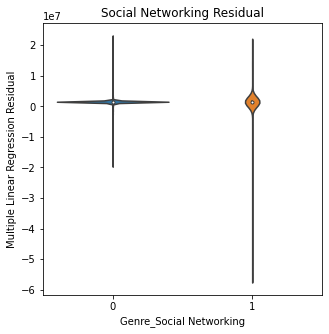

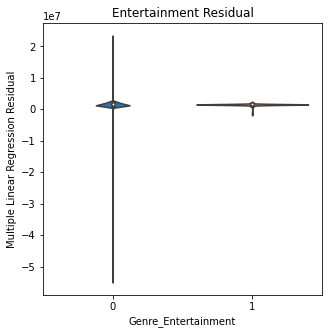

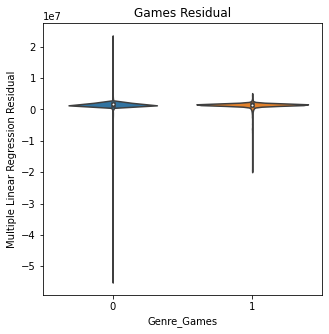

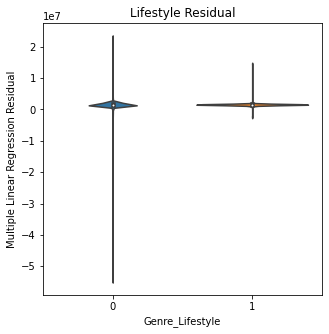

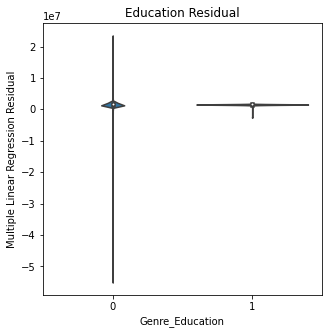

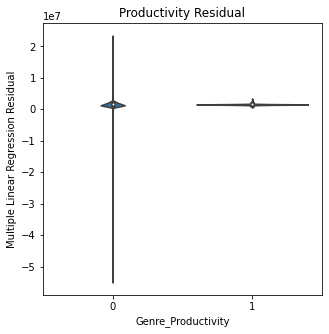

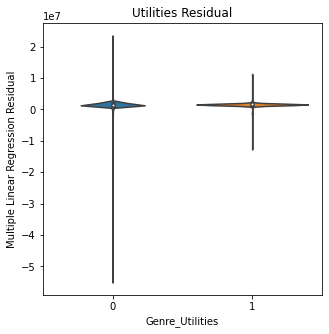

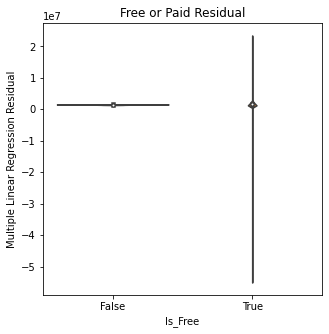

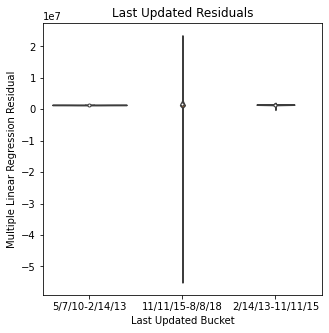

In [36]:
test["Multiple Linear Regression Residual"] = test.apply(lambda row: ((coefficent[0]*row['Installs'])+
                                        (coefficent[1]*row['Is_Free'])+
                                        (coefficent[2]*row['Category_SOCIAL'])+
                                        (coefficent[3]*row['Category_COMICS'])+
                                        (coefficent[4]*row['Category_TOOLS'])+
                                        (coefficent[5]*row['Category_COMMUNICATION'])+
                                        (coefficent[6]*row['Category_NEWS_AND_MAGAZINES'])+
                                        (coefficent[7]*row['Category_SPORTS'])+
                                        (coefficent[8]*row['Category_HEALTH_AND_FITNESS'])+
                                        (coefficent[9]*row['Category_FAMILY'])+
                                        (coefficent[10]*row['Category_BOOKS_AND_REFERENCE'])+
                                        (coefficent[11]*row['Category_LIFESTYLE'])+
                                        (coefficent[12]*row['Category_BUSINESS'])+
                                        (coefficent[13]*row['Category_SHOPPING'])+
                                        (coefficent[14]*row['Category_MEDICAL'])+
                                        (coefficent[15]*row['Category_GAME'])+
                                        (coefficent[16]*row['Category_PERSONALIZATION'])+
                                        (coefficent[17]*row['Category_PHOTOGRAPHY'])+
                                        (coefficent[18]*row['Category_TRAVEL_AND_LOCAL'])+
                                        (coefficent[19]*row['Category_DATING'])+
                                        (coefficent[20]*row['Category_PRODUCTIVITY'])+
                                        (coefficent[21]*row['Category_ART_AND_DESIGN'])+
                                        (coefficent[22]*row['Category_FOOD_AND_DRINK'])+
                                        (coefficent[23]*row['Category_VIDEO_PLAYERS'])+
                                        (coefficent[24]*row['Category_HOUSE_AND_HOME'])+
                                        (coefficent[25]*row['Category_MAPS_AND_NAVIGATION'])+
                                        (coefficent[26]*row['Category_FINANCE'])+
                                        (coefficent[27]*row['Category_EDUCATION'])+
                                        (coefficent[28]*row['Category_AUTO_AND_VEHICLES'])+
                                        (coefficent[29]*row['Category_WEATHER'])+
                                        (coefficent[30]*row['Category_BEAUTY'])+
                                        (coefficent[31]*row['Category_ENTERTAINMENT'])+
                                        (coefficent[32]*row['Category_EVENTS'])+
                                        (coefficent[33]*row['Category_LIBRARIES_AND_DEMO'])+
                                        (coefficent[34]*row['Category_PARENTING'])+
                                        (coefficent[35]*row['Content Rating_Adult'])+
                                        (coefficent[36]*row['Content Rating_Everyone'])+
                                        (coefficent[37]*row['Content Rating_Teen'])+
                                        (coefficent[38]*row['Last Updated'])+
                                        (coefficent[39]*row['Genre_Social Networking'])+
                                        (coefficent[40]*row['Genre_Entertainment'])+
                                        (coefficent[41]*row['Genre_Utilities'])+
                                        (coefficent[42]*row['Genre_Lifestyle'])+
                                        (coefficent[43]*row['Genre_Games'])+
                                        (coefficent[44]*row['Genre_Education'])+
                                        (coefficent[45]*row['Genre_Productivity'])+
                                        (coefficent[46]*row['Genre_Creativity']) - row['Reviews']), axis=1)

plt.title("Social Networking Residual")
vp = sns.violinplot(x="Genre_Social Networking", y="Multiple Linear Regression Residual",data=test)
plt.show()
plt.title("Entertainment Residual")
vp = sns.violinplot(x="Genre_Entertainment", y="Multiple Linear Regression Residual",data=test)
plt.show()
plt.title("Games Residual")
vp = sns.violinplot(x="Genre_Games", y="Multiple Linear Regression Residual",data=test)
plt.show()
plt.title("Lifestyle Residual")
vp = sns.violinplot(x="Genre_Lifestyle", y="Multiple Linear Regression Residual",data=test)
plt.show()
plt.title("Education Residual")
vp = sns.violinplot(x="Genre_Education", y="Multiple Linear Regression Residual",data=test)
plt.show()
plt.title("Productivity Residual")
vp = sns.violinplot(x="Genre_Productivity", y="Multiple Linear Regression Residual",data=test)
plt.show()
plt.title("Utilities Residual")
vp = sns.violinplot(x="Genre_Utilities", y="Multiple Linear Regression Residual",data=test)
plt.show()
plt.title("Free or Paid Residual")
vp = sns.violinplot(x="Is_Free", y="Multiple Linear Regression Residual",data=test)
plt.show()

def bucket_datetime(date):
    if date >= datetime.datetime(2015, 11, 11):
        ret = "11/11/15-8/8/18"
    elif date >= datetime.datetime(2013, 2, 14):
        ret = "2/14/13-11/11/15"
    else:
        ret = "5/7/10-2/14/13"
    return ret


# Quickly convert the Last Updated column back to use the dates in buckets 
test = test.astype({'Last Updated': 'datetime64[ns]'})

test["Last Updated Bucket"] = test.apply(lambda row: bucket_datetime(row["Last Updated"]), axis=1)
plt.title("Last Updated Residuals")
vp = sns.violinplot(x="Last Updated Bucket", y="Multiple Linear Regression Residual",data=test)
plt.show()
test.drop(["Last Updated Bucket"], axis=1);

# Quickly convert the Last Updated column back to use in ML
test = test.astype({'Last Updated': 'long'})

Description of what we got here. 

12/16: having some weird problems where the multiple variable regression can be worse than the linear regression based on the dataset (MEASURED BY MSE, WHICH CHANGES WITH DIFFERENT TRAINING/TEST DATA) This is crazy and not good. If we can't fix it theyll find out about it no matter how we try to hide it so its worth fixing. I think that if we can't fix it, its okay to say "Introducing multiple variables fucked it up." Maybe itd be worth trying last_updated and installs only to predict reviews. 

A linear regression model's main weakness is outlier values, so we'll see if we can move to a model that can follow the data in a better way.

## Applying a Multiple Polynomial Regression Model ???
In this model, we use multiple independent variables from the dataset to predict our target variable. 

From our dataset, we will choose our independent variables from the information we learned during Data Exploration. 

# Cut Content?
Content that could probably be cut? A lot of things being tried here point to dead ends. Which is still kinda useful for showing thought process, but as of now hard to fit into the step-by-step "narrative" of our project

In [ ]:
genre_df.dtypes

In [ ]:
print(df["Category"].unique())

In [ ]:
# Later in project: Save half of the data for training and the other half for testing when making a predictive model
# I predict there are small issues with the genre system but I will work them out later, things should work without breaking rn

In [ ]:
#amount of unique values in Installs
print(df["Installs"].unique())

So installs moves up a decimal every two increments after switching from 1 to 5. So in addition to it being awkward to predict, it also grows exponentally which makes graphs awkward.  

This is a graph of the number of installs 

So we have a few options.

- We could try and carry on with installs as a numerical value. (Prob unwise)
- We could treat installs as a categorical value and use prediction methods like random trees.
- We could use number of reviews instead of installs

Below are some graphs to explore this more

Luckally reviews is a different story. We seem to get exact numbers with reviews. However as seen from the graph above, reviews don't necessarily installs which might make the variable unreliable in determining success. Also reviews have lots of zero values

In [ ]:
print(df["Reviews"].unique())
print("Number of unique vars in reviews: ",len(df["Reviews"].unique()))

Also worth noting that both graphs distribuitions are awful. Zero values from garbage apps people toss out onto the store plummet our average.

In [ ]:
#Set up for pie chart
unique_inst = log10_df["Installs"].unique() #all buckets
unique_inst.sort() #sort
#Calculates percentage of all buckets
inst_percent = list(map(lambda x: len(log10_df[log10_df["Installs"] == x])/len(log10_df) * 100,unique_inst))

#Creats labels for legend
labels = []
for x in list(zip(unique_inst,inst_percent)):
    label, percent = x
    labels.append(label + " - " + str(round(percent,2)) + "%")

#create pie chart. Patches gets color for legend
patches, texts = plt.pie(inst_percent, startangle=90, radius=1.2);

#Create legend
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)


#Title and display
plt.title("Percentage of 10^x Buckets")
plt.show()

In [ ]:
#Count category in per99 and create bar chart
count = per99.groupby('Category').size()
plt.xlabel("Amount")
plt.ylabel("Category")
plt.title("Top 1% Most Installed Apps Categories")
plt.barh(count.index,count.values)
plt.show()

#Count category in per97 and create bar chart
count = per97.groupby('Category').size()
plt.xlabel("Amount")
plt.ylabel("Category")
plt.title("Top 3% Most Installed Apps Categories")
plt.barh(count.index,count.values)
plt.show()

#Count category in per85 and create bar chart
count = per85.groupby('Category').size()
plt.xlabel("Amount")
plt.ylabel("Category")
plt.title("Top 15% Most Installed Apps Categories")
plt.barh(count.index,count.values)
plt.show()

#Count category for whole dataset and create bar chart
count = df.groupby('Category').size()
plt.xlabel("Amount")
plt.ylabel("Category")
plt.title("All App Categories")
plt.barh(count.index,count.values)
plt.show()

In [ ]:
#Break data into precentiles. Rounded down.
per99 = log10_df[log10_df["Installs"] == "10^9"]
per97 = per99.append(log10_df[log10_df["Installs"] == "10^8"])
per85 = per97.append(log10_df[log10_df["Installs"] == "10^7"])
per64 = per85.append(log10_df[log10_df["Installs"] == "10^6"])

#graph rating distribution for per99
ax = sns.boxplot(x=per99["Rating"])
ax.set(xlim=(1,5))
plt.title('Rating Distribution of Top 1% Most Installed Apps');
plt.show()

#graph rating distribution for per97
ax = sns.boxplot(x=per97["Rating"])
ax.set(xlim=(1,5))
plt.title('Rating Distribution of Top 3% Most Installed Apps');
plt.show()

#graph rating distribution for per85
ax = sns.boxplot(x=per85["Rating"])
ax.set(xlim=(1,5))
plt.title('Rating Distribution of Top 15% Most Installed Apps');
plt.show()

#graph rating distribution for per64
ax = sns.boxplot(x=per64["Rating"])
ax.set(xlim=(1,5))
plt.title('Rating Distribution of Top 36% Most Installed Apps');
plt.show()

#graph rating distribution for all
ax = sns.boxplot(x=log10_df["Rating"])
ax.set(xlim=(1,5))
plt.title('Rating Distribution of All Apps');
plt.show()

plt.boxplot(df["Rating"])
plt.show()

